### 1、支持向量机

#### 1.1 二分类线性可分支持向量机

#### 1.1.1 线性模型

什么是支持向量机SVM？

机器学习算法分类的几个指标：

1. 分类问题？回归问题？
2. 有监督？无监督？
3. 线性模型？非线性模型？
4. 特征离散？特征连续？
5. 凸优化？非凸优化？


* 基本形式：有监督二分类线性分类模型
* 扩展形式：
    1. 有监督二分类非线性分类模型
    2. 有监督多分类（线性/非线性）分类模型
    3. 有监督线性回归模型SVR
    4. 基于核函数的SVM/SVR
    
线性模型：特征的线性组合进行分类
模型表达式：$f(x) = w_1x_1 + w_2x_2 + \dots + w_dx_d + b = w^Tx + b$

例如：逻辑回归

> 说明：为什么说一般不能用线性回归来分类？一个很明显的问题就是存在很大程度上的误分类，进而演化出了逻辑回归和SVM。

#### 1.1.2 最大间隔分类器

数据线性可分：如何从多个线性分类器中进行选择？

> 说明：这样的能够进行分隔的线性分类器有无数个，以何标准来挑选最优的分类器呢？

* 核心想法：最大间隔分类器

    * 离数据最远的线性分类器最安全
    * 离数据最远的线性分类器最容易泛化
    
* SVM是线性模型中一种
* 虚线上的点被称为支持向量

> 说明：以上述思想，我们需要这个分类器距离两边的数据都要远，并且要能够尽量都分隔开；另外一种理解的思路是找样本点到分类器的最短距离的超平面，并最大化这个间隔，保证样本都能够分隔开，并具有划分能力。

#### 1.1.3 与逻辑回归的对比

回顾逻辑回归：

预测函数：

$$y = \frac{1}{1 + e^{-w^Tx}}$$

* 输出实际上是概率$p(y=1 \mid x)$

    * $w^Tx \mapsto ∞, p(y=1 \mid x) \mapsto 1$；$w^Tx$越大，输出越靠近1
    * $w^Tx \mapsto -∞, p(y=1 \mid x) \mapsto 0$；$w^Tx$越小，输出越靠近0
    
> 说明：通过对$y=1$样本的概率输出值判断其为1，或为0的情况。

损失函数：

$$\begin{align*}
L(x,y) &= -y\log p(y=1 \mid x) - (1 - y)\log(1 - p(y=1 \mid x)) \\
&=-y\log\frac{1}{1 + e^{-w^Tx}} - (1 - y)\log\left(1 - \frac{1}{1 + e^{-w^Tx}}\right) \\
&=y\log(1 + e^{-w^Tx}) - (1- y)\left(\log(e^{-w^Tx}) - \log(1 + e^{-w^Tx})\right) \\
&=(1 - y)w^Tx + \log(1 + e^{-w^Tx}) \\
\end{align*}$$

* 关于模型参数$w$，这是一个凸函数。如果将$w^Tx$看做自变量，该损失函数为Logistic损失函数。等价于最大似然函数/交叉熵损失函数。

正则化项：

$$\|w\|_2^2$$

* L2正则化
* 防止模型过拟合

优化目标函数：

$$\mathscr{l}(x,y) = \frac{1}{n}\sum_{i=1}^n-y\log p(y_i=1 \mid x_i) -(1 - y_i)\log(1 - p(y_i=1 \mid x_i)) + \frac{\lambda}{2}\|w\|_2^2$$

* 模型要点：

    * 模型形式：线性模型
    * 损失函数：0-1分布的最大似然/交叉熵/Logistic损失函数
    * 正则化：L2正则防止过拟合
    
支持向量机：

预测函数：

$$y = sign(w^Tx)$$

* 输出的不是概率，而是根据输出数值的符号，正负性，分别表示+1，-1和0，代表二分类。
* 预测输出的$w^Tx$的绝对值大小无关，只和$w^Tx$的符号有关。
* $w^Tx$几何意义：正比于$X$到平面的有向距离。（点到平面的距离不分正负）

损失函数：

$$L(x,y) = \max\{0,1 - yw^Tx\}$$

> 说明：这边的0表示负样本，1是正样本，也可以将0换成-1，表示负样本。

* 关于模型参数$w$，这是一个凸函数。如果将$yw^Tx$看做自变量，该损失函数称为Hinge（铰链）损失函数。当$yw^Tx \mapsto -∞$时，近似于Logistic损失函数。

正则化项：

$$\|w\|_2^2$$

* 正则化
* 防止模型过拟合
* 在SVM中，$\frac{1}{\|w\|_2^2}$对应于分类决策面的函数间隔

优化目标函数：

$$\mathscr{l}(x,y) = \frac{1}{n}\sum_{i=1}^n\max\{0,1 - y_iw^Tx_i\} + \frac{\lambda}{2}\|w\|_2^2$$

模型要点：

    * 模型形式：线性模型
    * 损失函数：Hinge损失函数
    * 正则化项：L2正则化防止过拟合，最大化分类问题
    
综合对比：

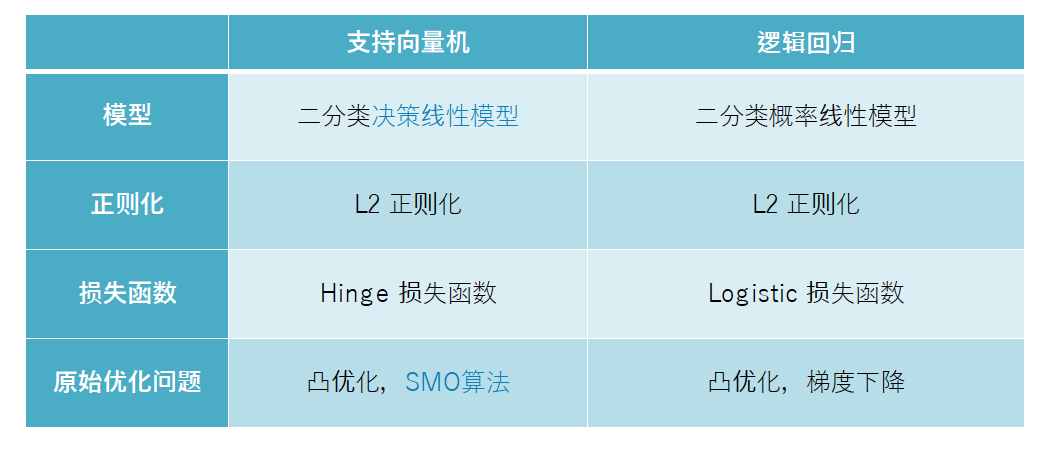

要点总结

* SVM：最大化间隔线性分类器
* Hingle损失函数 vs Logistic损失函数
* 确定性模型 vs 概率性模型
* 线性SVM的优化目标函数

#### 1.2 二分类线性不可分支持向量机

#### 1.2.1 线性支持向量机的几何解释

如何刻画/描述数据到分类器的间隔？

$x_i$到直线$y = w^Tx$的距离：$\frac{|w^Tx_i|}{\|w\|_2}$

$y = w^Tx$在数据集上的间隔：$\min\limits_{i}\frac{|w^Tx_i|}{\|w\|_2}$

注意到$\frac{|w^Tx_i|}{\|w\|_2}$关于$w$的齐次的，所以可以找到一个$w$，使得$\min\limits_i|w^Tx_i| = 1$

> 说明：如果要使得$\min\limits_i|w^Tx_i| = 1$，则变成要找到这个满足条件的$w$。

线性支持向量机的优化目标函数

* 所有数据点被正确分类：

$$y_iw^Tx_i \ge 1, \hspace{0.1cm} \forall i ∈ \mathbb{R}^n$$

* 最大化分类间隔：

$$\max\frac{1}{\|w\|_2} \Leftrightarrow \min\|w\|_2^2$$

约束优化形式：

$$\begin{align*}
\min \hspace{0.3cm} &\|w\|_2^2 \\
s.t.\hspace{0.5cm} &y_iw^Tx_i \ge 1, \forall i ∈ \mathbb{R}^n
\end{align*}$$

非约束优化形式：

$$\min \mathscr{l}(x,y) = \frac{1}{n}\sum_{i=1}^n\max\{0,1 - y_iw^Tx_i\} + \frac{\lambda}{2}\|w\|_2^2$$

<font color=red>SVM的约束优化问题等价于非约束优化问题！</font>

#### 1.2.2 松弛变量

如何扩展到线性不可分？几何思想：

$$y_iw^Tx_i \ge 1, \hspace{0.1cm} \forall i ∈ \mathbb{R}^n$$

要求所有数据点到分类器的距离$> 1$

引入松弛变量$\epsilon_i$，允许线性不可分的点到分类器距离$< 0$：

$$y_iw^Tx_i \ge 1 - \epsilon_i, \hspace{0.1cm} \epsilon_i \ge 0, \hspace{0.3cm} \forall i ∈ \mathbb{R}^n$$

* 如$\epsilon = 0$，那么$x_i$被正确分类，并且分类间隔$> 1$
* 若$0 < \epsilon_i \le 1$，那么$x_i$被正确分类，分类间隔大于0，但是$< 1$
* 若$\epsilon_i > 1$，那么$x_i$被错误分类，分类间隔$< 0$

#### 1.2.3 线性不可分支持向量机

约束优化形式：

$$\begin{align*}
\min \hspace{0.3cm} &\frac{\lambda}{2}\|w\|_2^2 + \frac{1}{n}\sum_i\epsilon_i \\
s.t. \hspace{0.3cm} &y_iw^Tx_i \ge 1 - \epsilon_i, \hspace{0.1cm} \forall i ∈ \mathbb{R}^n \\
&\epsilon_i \ge 0
\end{align*}$$

非约束优化形式：

$$\min \mathscr{l}(x,y) = \frac{1}{n}\sum_{i=1}^n\max\{0,1 -  y_iw^Tx_i\} + \frac{\lambda}{2}\|w\|_2^2$$

* 线性可分与线性不可分统一的形式
* SVM是数据自适应的
* 本质是一个凸优化问题，二次规划
* 可以转换为二次规划一般形式求解，也可以使用梯度下降法求解

要点总结

* SVM的几何意义与解释
* 松弛变量的几何意义
* SVM的优化问题，凸二次规划问题
* SVM的数据自适应性质

#### 1.3 多分类支持向量机

#### 1.3.1 One vs One方法

SVM是二分类器，如何扩展到k分类（k > 2）?

* one vs one - 即1对1
* 训练时刻：训练k(k-1)/2个二分类器$f_{i,j}(x)$
* $f_{i,j}(x)$预测$X$是第$i$类的可能性大于第$j$类的可能性
* 使用全部的k(k-1)/2个分类器
* 预测$X$为胜利次数最多的类别

> 说明：在不知道是谁的情况，类似匿名投票，选取两两投票总和最多的类别作为这个样本的类别

优点：

* 适用性广，LibSVM默认的实现方法
* 对于所有二分类器都可使用，概率/非概率分类器均可

缺点：

* 训练时计算复杂度高：$O(k^2)$
* 测试时计算复杂度高：$O(k^2)$

#### 1.3.2 One vs All方法

* One vs All - 即1对多
* 训练时刻：训练k个二分类器，$f_i(x)$
* $f_i(x)$预测$X$属于第$i$类的分数
* 使用全部k个分类器
* 预测$X$为得分最高的类别

优点：

* 适用性有限，要求$f_i(x)$表示$X$属于第$i$类的一个打分
* 多使用于概率分类器，如逻辑回归

缺点：

* 训练时计算复杂度高：$O(k)$
* 测试时计算复杂度高：$O(k)$

要点总结

* One vs One方法 （SVM）
    * k个类别，需要训练k(k-1)/2个分类器
    * 每两个类别产生一个分类器
    * 最终决策需要这k(k-1)/2个分类器共同投票对每个样例的分类结果
    * 可能会存在某个样例的投票结果一样，也就说属于多个类别的情况
* One vs All方法（LR）
    * 多元分类，一个样本集中有多个类别
    * 不同于多标签分类，多标签分类是指一个样本可以属于多个类别
    * 分类器不仅要输出类别标签，还要有一个供决策的置信度
    * 即使训练集类别是均衡的，二分类器看到的负例集要大于正例集，从大部分为负样例中找正样例
    * 每认定k类中的一个类别，以找出样例中所有属于该类别的类，其它则不属于该类别
    * 预测时取概率最大的那个分类器的类别
    
> 说明：该方法只适合于监督式学习，前提是知道有k个类别，遍历这k个类别，One vs One会产生k(k-1)/2分类器，两两类别产生一个分类器，用这k(k-1)/2个分类器对新样本进行分类决策，看其属于某个类别的投票总数最多的则属于该类，因每个分类器都是一个二分类，输出以-1,1和0的数值，以此种方式可以对每个分类器的决策结果进行累加评判；而One vs All则有k个分类器，用这k个分类器对新样本进行概率值输出判断，会得到每个类别的概率值，以概率值最高的那个类别作为该类别。所以说为什么说SVM适用适用One vs One，而LR适合适用One vs All，从以上解释中也可以看得很明白！

参考：

* https://zh.wikipedia.org/wiki/多元分类
* http://kubicode.me/2015/08/30/Machine%20Learning/Multiclass-Classification/

In [2]:
# one vs one
from sklearn.multiclass import OneVsOneClassifier
OvO = OneVsOneClassifier(estimator='SVM')

# one vs all
from sklearn.multiclass import OneVsRestClassifier
OvR = OneVsRestClassifier(estimator='LR')

#### 1.4 SVM工具包介绍

#### 1.4.1 LibSVM

* 支持多种编程语言，提供命令行使用接口
* 支持线性/非线性SVM，支持分类和回归
* 目前最流行并且高效的SVM开源实现

    https://www.csie.ntu.edu.tw/~cjlin/libsvm/

#### 1.4.2 SVMLight

* C/C++实现
* 支持基于SVM的结构预测以及半监督SVM
* 支持基于SVM的排序学习算法

    http://svmlight.joachims.org

#### 1.4.3 Scikit-Learn

* Python实现，轻量级，接口简单，适用科研适用
* 支持线性/非线性，分类/回归SVM

    http://scikit-learn.org/stable/modules/svm.html

### 2、SVM对偶形式

#### 2.1 SVM对偶形式

#### 2.1.1 SVM约束优化问题

线性SVM原问题：

$$\begin{align*}
\min \hspace{0.3cm} &\frac{1}{2}\|w\|_2^2 \\
s.t. \hspace{0.3cm} &y_iw^Tx_i \ge 1, \hspace{0.1cm} \forall i ∈ \mathbb{R}^n \\
\end{align*}$$

* 目标函数关于$w$是二次函数
* 约束条件关于$w$是线性函数
* 核心：二次凸优化问题
    * 光滑优化函数
    * 局部最优值即全局最优解
    
凸优化

* 凸集合：

    For $x,x' ∈ X$ it follows that $\lambda x + (1 - \lambda)x' ∈ X$ for $\lambda ∈ [0,1]$
    
    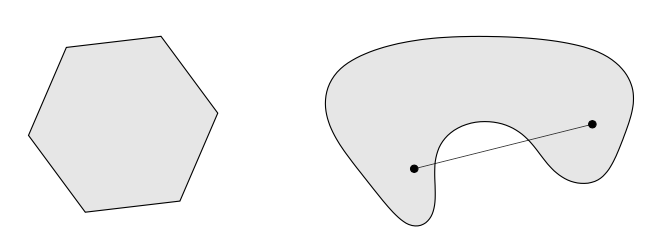
    
* 凸函数：

    $$\lambda f(x) + (1 - \lambda)f(x') \ge f(\lambda x + (1 - \lambda)x') \hspace{0.2cm} \text{for} \hspace{0.2cm} \lambda ∈ [0,1]$$

    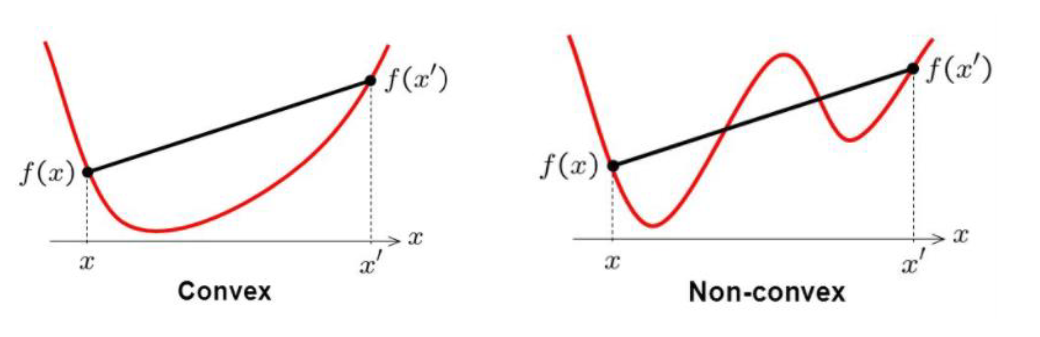
    
* 凸优化问题一般形式：

    $$\begin{align*}
\min \limits_{x} \hspace{0.3cm} &f(x) \\
subject\hspace{0.2cm}to \hspace{0.3cm} &c_i(x) \le 0 \hspace{0.1cm} \text{for all} \hspace{0.1cm} i
\end{align*}$$

    * 目标函数$f(x)$是凸函数
    * 约束函数$c_i(x)$是凸函数
    
    $$\begin{align*}
\min \hspace{0.3cm} &\frac{1}{2}\|w\|_2^2 \\
s.t. \hspace{0.3cm} &y_iw^Tx_i \ge 1, \hspace{0.1cm} \forall i ∈ \mathbb{R}^n \\
\end{align*}$$

    * 二次函数是凸函数
    * 线性函数是凸函数

#### 2.1.2 Lagrange乘子法

Lagrange乘子法：将约束优化转换为非约束优化

$$\begin{align*}
\min \limits_{x} \hspace{0.3cm} &f(x) \\
subject\hspace{0.2cm}to \hspace{0.3cm} &c_i(x) \le 0 \hspace{0.1cm} \text{for all} \hspace{0.1cm} i
\end{align*}$$

$$\Downarrow$$

$$\min\limits_x\max\limits_{\lambda_i \ge 0} \hspace{0.3cm} f(x) + \sum_{i=1}^n\lambda_ic_i(x)$$

* 为每一个不等式约束引入一个Lagrange乘子$\lambda_i$
* Lagrange乘子$\lambda_i \ge 0, \hspace{0.2cm} \forall_i ∈ \mathbb{R}^n$
* 将原来的$minimize$问题变为一个$minimax$问题
* 通过Lagrange乘子法将约束优化问题转换为非约束优化问题
* 转换后的非约束优化问题与原约束优化问题最优解相同

Lagrange乘子法：将约束优化转换为非约束优化

$$\begin{align*}
\min \limits_{x} \hspace{0.3cm} &f(x) \\
subject\hspace{0.2cm}to \hspace{0.3cm} &c_i(x) \le 0 \hspace{0.1cm} \text{for all} \hspace{0.1cm} i
\end{align*}$$

$$\Downarrow$$

$$原问题：\min\limits_x\max\limits_{\lambda_i \ge 0} \hspace{0.3cm} f(x) + \sum_{i=1}^n\lambda_ic_i(x)$$

$$\Downarrow$$

$$对偶问题：\max\limits_{\lambda_i \ge 0}\min\limits_x c f(x) + \sum_{i=1}^n\lambda_ic_i(x)$$

当原问题是凸优化问题时，则有$P^* = D^*$

Lagrange函数：

$$\mathcal{L}(x,\lambda) = f(x) + \sum_{i=1}^n\lambda_ic_i(x)$$

对偶理论：

$$\min\limits_x\max\limits_{\lambda} \hspace{0.3cm} \mathcal{L}(x,\lambda) = \max\limits_{\lambda}\min\limits_x \hspace{0.3cm} \mathcal{L}(x,\lambda)$$

定义对偶函数：

$$g(\lambda) = \min\limits_x \hspace{0.3cm} \mathcal{L}(x,\lambda)$$

原问题与对偶问题：

对于任意可行解$x,\lambda$我们有：

$$f(x) \ge g(\lambda)$$

并且原问题与对偶问题的最优解相等：

$$f(x^*) = g(\lambda^*)$$

对于凸优化问题，可以通过求解对偶问题的最优解来解决原问题！

原问题与对偶问题：

$Lagrange函数 \hspace{4.5cm} 对偶函数$

$\mathcal{L}(x,\lambda) = f(x) + \sum_{i=1}^n\lambda_ic_i(x) \Longrightarrow g(\lambda) = \min\limits_x \hspace{0.3cm} \mathcal{L}(x,\lambda)$

$原问题 \hspace{3.5cm} 对偶问题$

$\begin{align*}
\min\limits_x \hspace{0.3cm} &f(x)  \\
s.t. \hspace{0.3cm} &c_i(x) \le 0, \forall_i
\end{align*}$
$\Longleftrightarrow$
$\begin{align*}
\max\limits_{\lambda} \hspace{0.3cm} &g(\lambda) \\
s.t. \hspace{0.3cm} &\lambda_i \le 0, \forall_i
\end{align*}$

$SVM原问题 \hspace{6.0cm} SVM对偶问题$

$\begin{align*}
\min \hspace{0.3cm} &\frac{1}{2}\|w\|_2^2 \\
s.t. \hspace{0.3cm} &y_iw^Tx_i \ge 1, \hspace{0.1cm} \forall i ∈ \mathbb{R}^n \\
\end{align*}$
$\Longrightarrow$
$\begin{align*}
\max \hspace{0.3cm} &\sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i,j=1}^ny_iy_j\alpha_i\alpha_j(x_i \cdot x_j) \\
s.t.  \hspace{0.3cm} &\alpha_i \ge 0, \sum_{i=1}^ny_i\alpha_i = 0
\end{align*}$

#### 2.1.3 SVM的对偶形式

SVM对偶问题：

$$\begin{align*}
\max \hspace{0.3cm} &\sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i,j=1}^ny_iy_j\alpha_i\alpha_j(x_i \cdot x_j) \\
s.t.  \hspace{0.3cm} &\alpha_i \ge 0, \sum_{i=1}^ny_i\alpha_i = 0
\end{align*}$$

* 凸二次优化问题的对偶问题还是一个凸二次优化问题
* 原问题优化变量为$w$
* 对偶问题优化变量为$\alpha_i, \hspace{0.1cm}\forall_i ∈ \mathbb{R}^n$
* $w$与$\alpha_i$的关系：$w = \sum_{i=1}^n\alpha_iy_ix_i$
* $w$只依赖于$\alpha_i > 0$的点，称为支持向量
* $w$通常有稀疏的表达形式（只有少量支持向量）
* 用$w$来进行预测：$y = w^Tx = \sum_{i=1}^n\alpha_iy_i(x_i \cdot x)$
* 对偶问题以及预测问题只依赖于向量内积

要点总结

* 凸优化的基本概念：凸集合与凸函数
* 凸优化原问题以及其对偶问题
* 凸二次规划及其对偶形式
* 线性SVM的对偶形式

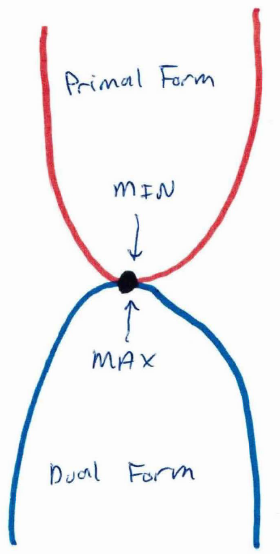

#### 2.2 核函数以及核技巧

#### 2.2.1 特征映射

什么是特征映射？

$$\phi: R^d \mapsto R^p, \hspace{0.5cm} d \le p$$

将输入数据从低维空间到高维空间的函数变换，使得变换后的数据更加容易处理（分类/回归）

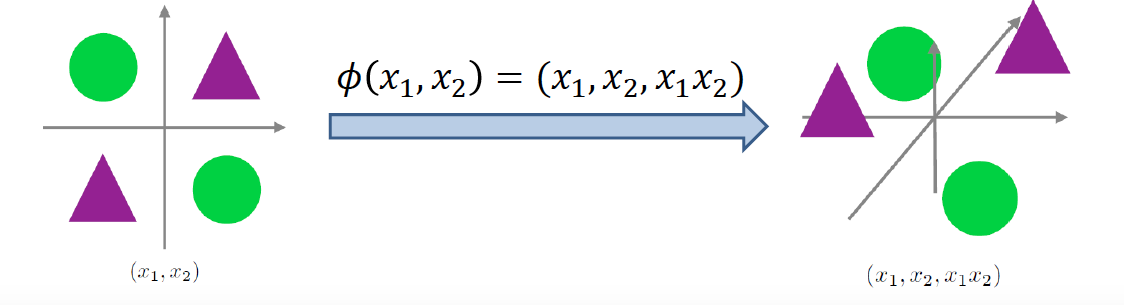

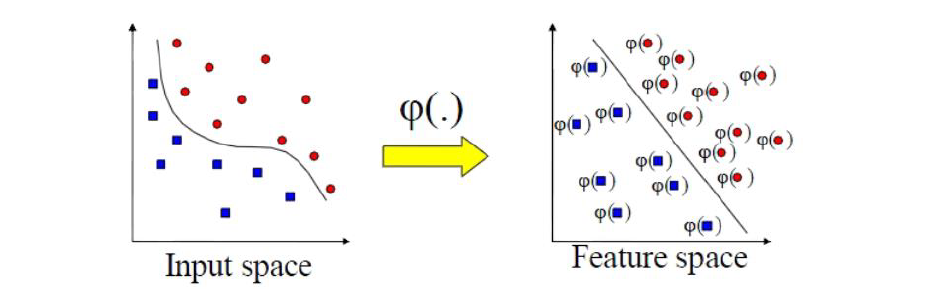

举例（二次二项式）：

$\phi(x) = (x_1^2,\sqrt{2}x_1x_2,x_2^2)$

$\phi(x) \cdot \phi(x') = (x_1x_1' + x_2x_2')^2 = (x \cdot x')^2$

> 多项式一般是指多元高次项

问题：

* 如何定义适合问题的特征变换？
* 显式定义特征变换后增加计算复杂度？
* 例如：原本有1000个特征，使用二项式变换后，有500,000（50W）个特征
* 更高维的多项式变换会引入更多的特征，极大增加计算复杂度

#### 2.2.2 核函数

关键想法：我们不需要显式地计算出特征映射，只需要变换后特征的内积！

线性SVM对偶形式：

$$\begin{align*}
\max \hspace{0.3cm} &\sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i,j=1}^ny_iy_j\alpha_i\alpha_j(x_i \cdot x_j) \\
s.t.  \hspace{0.3cm} &\alpha_i \ge 0, \sum_{i=1}^ny_i\alpha_i = 0
\end{align*}$$

如何简单地计算出：$\phi(x_i) \cdot \phi(x_j), \forall_{i,j} ∈ \mathcal{R}^n$

* 直接计算变化后的内积，不通过$\phi(x)$
* 例如：$\phi(x) = (x_1^2,\sqrt{2}x_1x_2,x_2^2), \hspace{0.1cm} \phi(x) \cdot \phi(x') = (x_1x_1' + x_2x_2')^2 = (x \cdot x')^2$

定义核函数：

$$\mathcal{K}(x,x'): R^d \times R^d \mapsto R$$

* 核函数是一个对称函数：$\mathcal{K}(x,x') = \mathcal{K}(x',x)$

* 核函数隐式地定义了一个特征映射：$\exists\phi,s.t.,\mathcal{K}(x,x') = \phi(x) \cdot \phi(x')$

* 核函数的计算在原空间：计算复杂度低

* 例如：$\mathcal{K}(x,x') = (x \cdot x' + c)^k$，称为$k$阶多项式核函数
    * $k=1,c=0$，退化为原空间内积
    * $k=1,c=0$，二次多项式内积，XOR的例子
    * $k>2,\dots$
    
> 说明：从特征映射到核函数的理解：低维空间映射到高维空间，再拉回到低维空间

更多核函数例子：

* 线性核函数：$\mathcal{K}(x,x') = x \cdot x'$
* 拉普拉斯核函数：$\mathcal{K}(x,x') = \exp(-\lambda\mid x - x' \mid)$
* 高斯核函数：$\mathcal{K}(x,x') = \exp(-\lambda\mid x - x' \mid^2)$
* 多项式核函数：$\mathcal{K}(x,x') = (x \cdot x' + c)^k, k ∈ N$
* 条件密度核函数：$\mathcal{K}(x,x') = E_c\left[p(x \mid c) \cdot p(x' \mid c)\right]$

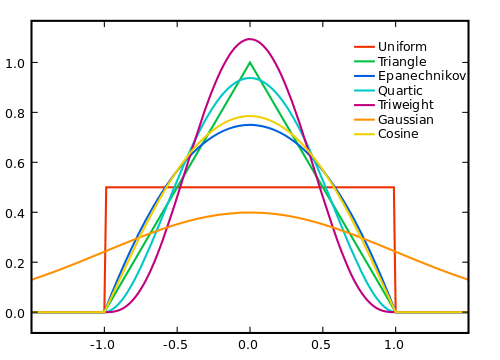

实际中经常使用的核函数：

* 高斯核函数：$\mathcal{K}(x,x') = \exp(-\lambda\mid x - x' \mid^2)$
* 多项式核函数：$\mathcal{K}(x,x') = (x \cdot x' + c)^k, k ∈ N$

* 高斯核函数对应无穷维特征空间
* 多项式核函数对应有限维特征空间

> 说明：指数函数$e^x$在$x_0 = 0$处的泰勒展开为$1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots + \frac{x^n}{n!}$，进而高斯核函数的泰勒展开为$1 + \left(-\lambda\mid x - x' \mid^2\right) + \frac{\left(-\lambda\mid x - x' \mid^2\right)^2}{2!} + \frac{\left(-\lambda\mid x - x' \mid^2\right)^3}{3!} + \dots + \frac{\left(-\lambda\mid x - x' \mid^2\right)^n}{n!}$，其每一项都是一个多项式核函数，而多项式核函数可以对应到有限维度，而高斯核函数则可以对应到无穷维。
* https://www.zhihu.com/question/35602879/answer/63963315
* https://www.quora.com/Why-does-the-RBF-radial-basis-function-kernel-map-into-infinite-dimensional-space-mentioned-many-times-in-machine-learning-lectures


* 工程经验：
    * 高斯核函数：$\lambda$的选择至关重要
    * 多项式核函数：指数$k$的选择至关重要

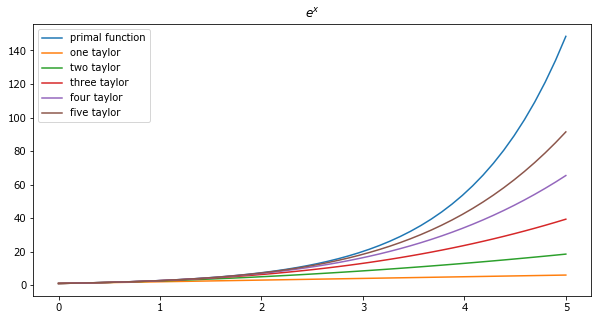

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

x = np.linspace(0,5)
y = np.exp(x)
y1 = 1 + x
y2 = 1 + x + (x**2)/np.math.factorial(2)
y3 = 1 + x + (x**2)/np.math.factorial(2) + (x**3)/np.math.factorial(3)
y4 = 1 + x + (x**2)/np.math.factorial(2) + (x**3)/np.math.factorial(3) + (x**4)/np.math.factorial(4)
y5 = 1 + x + (x**2)/np.math.factorial(2) + (x**3)/np.math.factorial(3) + (x**4)/np.math.factorial(4) + (x**5)/np.math.factorial(5)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.title('$e^x$')

labels = ['primal function','one taylor','two taylor','three taylor','four taylor','five taylor']
plt.legend(labels=labels)

要点总结

* 核函数的定义
* 特征变换：线性到非线性
* 高斯核函数
* 核技巧：将线性模型转换为非线性模型

#### 2.3 非线性支持向量机

#### 2.3.1 核技巧的应用

如何将线性支持向量机扩展到非线性支持向量机？

SVM对偶问题：

$$\begin{align*}
\max \hspace{0.3cm} &\sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i,j=1}^ny_iy_j\alpha_i\alpha_j\mathcal{K}(x_i \cdot x_j) \\
s.t.  \hspace{0.3cm} &\alpha_i \ge 0, \sum_{i=1}^ny_i\alpha_i = 0
\end{align*}$$

* 将线性内积（线性核函数）替换为$\mathcal{K}(x_i \cdot x_j)$
* 新模型在变换后的空间仍然是线性模型（新模型与原模型的内积都是一样的，不会影响模型的线性关系）
* 新模型在原空间相对于$x$是非线性模型（较变量$x$是非线性的，写成核函数的形式就知道了）
* 计算复杂度较小：只需计算核矩阵$\mathcal{K} = \mathcal{K}_{ij} = \mathcal{K}(x_i \cdot x_j)$

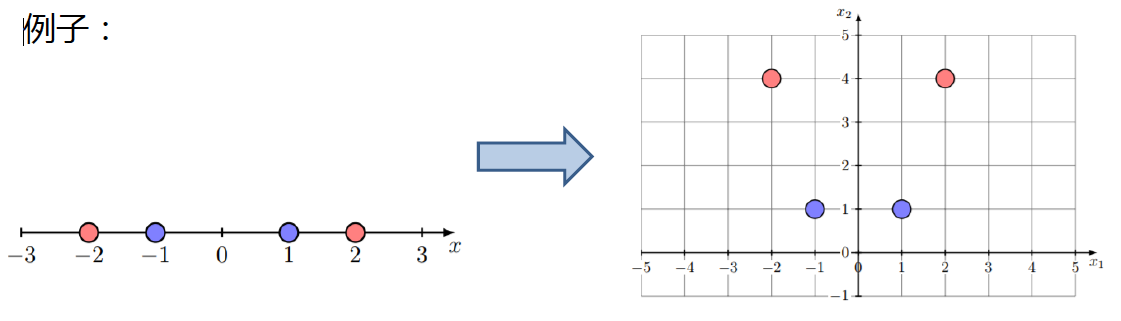

非线性SVM对偶问题：

$$\begin{align*}
\max \hspace{0.3cm} &\sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i,j=1}^ny_iy_j\alpha_i\alpha_j\mathcal{K}(x_i \cdot x_j) \\
s.t.  \hspace{0.3cm} & 0 \le \alpha_i \le C, \sum_{i=1}^ny_i\alpha_i = 0
\end{align*}$$

* 凸二次规划问题
* 可以求得全局最优解
* 和线性SVM对偶问题的形式几乎一样，只是将核函数换了

#### 2.3.2 SMO算法

求解非线性支持向量机优化问题：

$$\begin{align*}
\max \hspace{0.3cm} &\sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i,j=1}^ny_iy_j\alpha_i\alpha_j\mathcal{K}(x_i \cdot x_j) \\
s.t.  \hspace{0.3cm} & 0 \le \alpha_i \le C, \sum_{i=1}^ny_i\alpha_i = 0
\end{align*}$$

* SMO算法是坐标上升法的一个特例
* 坐标上升算法：
    * 适用于光滑凸优化问题
    * 优化多个变量
    * 每次进优化其中一个变量，固定其它所有变量不变，直至算法收敛
    * 目前SVM求解的最快算法，也是LibSVM默认实现算法，通常远快于梯度下降算法
    
举例：

$$\min \hspace{0.2cm} x_1^2 + x_2^2$$

* 初始化算法$(x_1,x_2) = (-3,-4)$
* 固定$x_2$，优化一维函数$x_1^2 + 16$
* 求得最优解$x_1 = 0$
* 固定$x_1 = 0$，优化一维函数$0 + x_2^2$
* 同样求得最优解$x_2 = 0$
* 再次固定$x_2 = 0$，优化一维函数$x_1^2 + 0$
* 求得最优解$x_1 = 0$，与上一轮迭代之相同
* 再次固定$x_2 = 0$，优化一维函数$0 + x_2^2$
* 求得最优解$x_1 = 0$，与上一轮迭代之相同
* 算法收敛，停止，得到全局最优解$(x_1,x_2) = (0,0)$

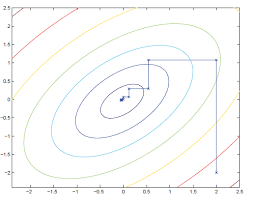

要点总结

* 核技巧在SVM中的应用
* 如何将线性支持向量机转变为非线性
* SMO算法以及坐标上升算法

#### 2.4 支持向量回归

回归问题的一般架构：

* 回归损失函数

$$\mathscr{l}(y,f(x)) = \frac{1}{n}\sum_{i=1}^n\mathscr{l}(y_i,f(x_i))$$

* 正则化

$$\Omega(f) = \frac{1}{2}\|\mathbf{w}\|_2^2$$

* 回归约束优化问题：

    $$\begin{align*}
\min \hspace{0.3cm} &\frac{\lambda}{2}\|\mathbf{w}\|_2^2 + \frac{C}{n}\sum_{i=1}^n\mathscr{l}(\epsilon_i) \\
s.t. \hspace{0.3cm} &\epsilon_i = y_i - \mathbf{w}^Tx_i, \forall_i ∈ \mathbb{R}^n
\end{align*}$$

    * $\epsilon_i$被称为松弛变量
    * 根据不同的损失函数会引申出不同的模型
    
* L2损失函数：Ridge Regression
* L1损失函数：Lasso Regression or Median Regression
* $\epsilon-insensitive$不敏感损失函数：Support Vector Regression（支持向量回归）
    * $\mathscr{l}(y,f(x)) = \max(0,|y - f(x)| - \epsilon)$
    
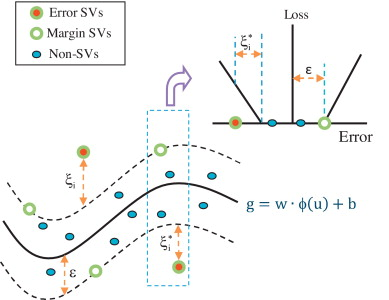

支持向量机回归的性质：

* 鲁棒性好
* 对异常值不敏感
* 可以用与SVM同样的优化算法进行优化（多了一倍的变量）

要点总结

* 回归问题的一般框架
* 支持两回归对应的损失函数
* 支持向量回归的鲁棒性

### 3、攀登传统机器学习的珠峰 - SVM

SVM的基本形式是一个有监督的决策线性（只输出-1和1，不输出概率）二分类模型，它是间隔最大化的分类器。主要包括以下几种形式：

* 当训练数据线性可分时，支持向量机通过硬间隔最大化学习分类器，称为硬间隔支持向量机；

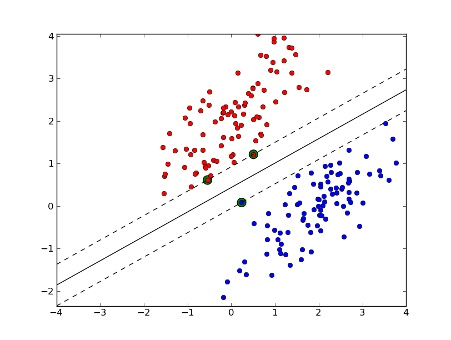

* 当训练数据近似线性可分时，支持向量机通过软间隔最大化学习分类器，称为软间隔支持向量机；
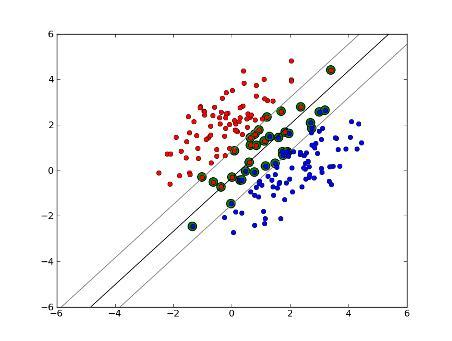

* 当训练数据线性不可分时，支持向量机通过核技巧和软间隔最大化学习分类器，称为非线性支持向量机
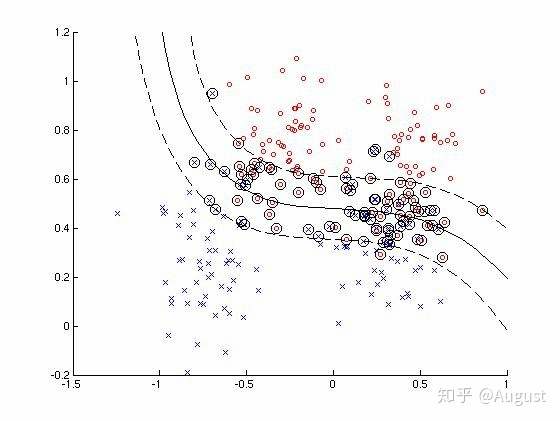

此外，SVM既支持二元分类也支持多元分类，既支持分类问题也支持回归问题。

SVM诞生于上世纪九十年代，由于它良好的分类性能，自一诞生便席卷机器学习领域，并牢牢压制了神经网络领域好多年，据说LeNet5（一种CNN手写数字识别算法，属于神经网络）自1998年诞生，在后来的好长一段时间并未能火起来，最主要的原因就是SVM，那会儿SVM也能达到类似的效果甚至超过LeNet5，而且比LeNet5计算量小。在不考虑集成学习算法和特定场景的情况下，在分类算法中SVM毫无疑问是性能最好的分类器。

#### 3.1 预备知识：感知机模型

#### 3.1.1 假设函数

感知机模型就是尝试找到一个超平面（线性决策边界），能够把所有的而此类别隔离开。

用教学的语言来说，对于一个二分类问题，如果我们有$m$个样本，$n$维特征，如下：

$\left[(x_1^{(0)},x_2^{(0)},\dots,x_n^{(0)},y_0),(x_1^{(1)},x_2^{(1)},\dots,x_n^{(1)},y_1),\dots,(x_1^{(m)},x_2^{(m)},\dots,x_n^{(m)},y_n)\right]$

我们的目标是找打这样一个超平面，即：

$$w_1x_1 + w_2x_2 + \dots + w_nx_n + b = 0 \Leftrightarrow \mathbf{w}^T\mathbf{x} + b = 0$$

作为决策边界，将不同类别的数据分来。即：

$$y = sign(w_1x_1 + w_2x_2 + \dots + w_nx_n + b = 0) \Leftrightarrow y = sign(\mathbf{w}^T\mathbf{x} + b = 0)$$

其中$sign(x) = 
\begin{cases}
-1 & x < 0 \\
0 & x = 0 \\
1 & x > 0
\end{cases}$

> 说明：这边就是用线性回归模型来实现分类的例子，把它理解为一个分隔超平面，套用符号函数来实现预测。

通俗点来说，我们就是要找一个超平面$\mathbf{w}^T\mathbf{x} + b = 0$作为线性决策边界，在超平面的上方我们定义为$y = 1$，在超平面的下方我们定义为$y = -1$。模型的原理如下图所示：

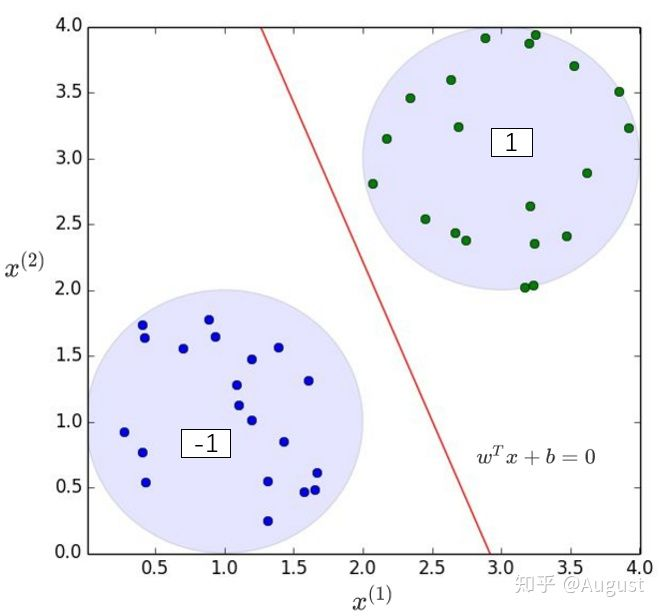

> 说明：这边的符号函数类似于逻辑回归使用的Sigmod函数的压缩效果。

#### 3.1.2 损失函数

与逻辑回归模型不同，正负样本的标签定义为1和-1（逻辑回归正负样本的标签是1和0）为什么会这样定义？

因为正确分类的样本满足$y(w^Tx + b) > 0$，而错误分类的样本满足$y(w^Tx + b) < 0$，这样可以更加容易找到正确分类的样本和误分类样本。感知机代价函数的优化目标，就是期望所有误分类的样本，到超平面的距离之和最小。怎样定义这个距离呢？

我们知道，我们的决策边界的方程式是$\mathbf{w}^T\mathbf{x} + b = 0$。

我们来研究一下这个式子$\mathbf{w}^Tx^{(i)} + b$，加入我们的样本点在决策树边界上，必须满足$\mathbf{w}^Tx^{(i)} + b = 0$，随着该样本点偏离决策边界，$\mid \mathbf{w}^Tx^{(i)} + b \mid$也会变大。且如果样本点的决策边界下方$\mathbf{w}^Tx^{(i)} + b < 0$，如果样本点在决策边界上方$\mathbf{w}^Tx^{(i)} + b > 0$。我们可以用$\mid\mathbf{w}^Tx^{(i)} + b\mid$来表示样本点距离决策边界的距离。

因使用绝对值函数存在不可导，可用$-y^{(i)}(\mathbf{w}^Tx^{(i)} + b)$替代，故而有感知机的代价函数为：

$$J(\mathbf{w},b) = -\sum_{x^{(i)} ∈ M_{erro}}y^{(i)}(\mathbf{w}^Tx^{(i)} + b)$$

#### 3.1.3 优化算法

因损失函数里的样本都是误分类的样本，并不能用批量梯度下降算法BGD，只能使用随机梯度下降SGD，每次更新只能使用一个误分类样本来更新参数。即：

$$\mathbf{w} := \mathbf{w} + \alpha y^{(i)}x^{(i)}$$
$$b := b + \alpha\sum_{x^{(i)} ∈ M_{erro}}y^{(i)}$$

其中$\alpha$为步长，$y^{(i)}$为样本输出$1$或者$-1$，$x^{(i)}$为$n \times 1$的向量。

> 说明：因只能使用随机梯度下降算法，所以不是所有的样本都参与参数迭代，故而没有求和符号。

#### 3.1.4 模型总结

算法的输入为$m$个样本，每个样本对应于$n$维特征和一个二元类别输出$1$或者$-1$，如下：

$\left[(x_1^{(0)},x_2^{(0)},\dots,x_n^{(0)},y_0),(x_1^{(1)},x_2^{(1)},\dots,x_n^{(1)},y_1),\dots,(x_1^{(m)},x_2^{(m)},\dots,x_n^{(m)},y_n)\right]$

输出为线性决策边界的模型系数$\mathbf{w},b$

算法的执行步骤如下：

1. 初始化模型系数$\mathbf{w},b$和步长$\alpha$。
2. 在训练集里面选择一个误分类的点$(x^{(i)},y^{(i)})$，这个点应该满足：$y^{(i)}(\mathbf{w}^Tx^{(i)} + b) < 0$。
3. 对$\theta$向量进行一次随机梯度下降的迭代：
$$\mathbf{w} := \mathbf{w} + \alpha y^{(i)}x^{(i)}$$
$$b := b + \alpha\sum_{x^{(i)} ∈ M_{erro}}y^{(i)}$$
4. 检查训练集里是否还有误分类点，如果没有，算法收敛。如果有，继续第2步。

#### 3.1.5 感知机的遗留问题

因感知机的分隔超平面有多个，也就是说有多个感知机模型可以实现分隔，如何选择性能最优且具有泛化能力的模型，这就是我们SVM里的运用。

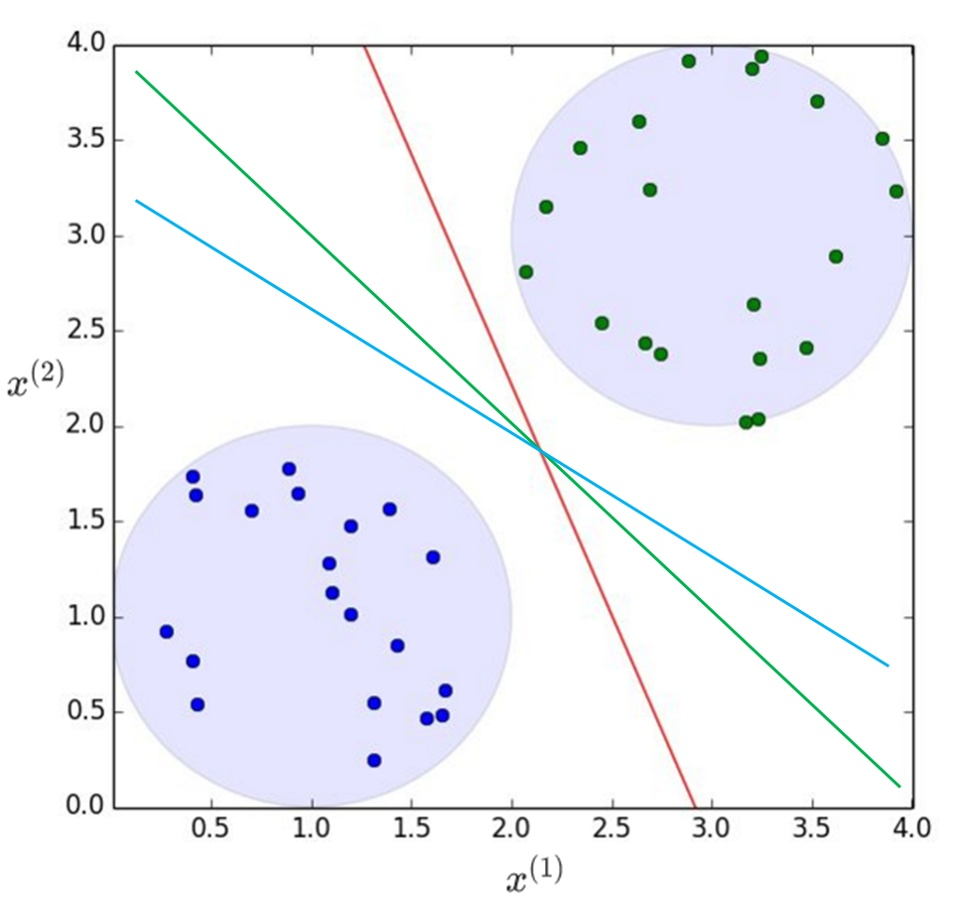

#### 3.2 线性支持向量机

#### 3.2.1 线性支持向量机的三要素

假设函数：

$$\widehat{y} = sign(w^Tx + b)$$

其中$sign(x)
\begin{cases}
-1 & x < 0 \\
0 & x = 0 \\
1 & x > 0
\end{cases}$

代价函数：

$$J(\theta) = \max{0,1 - \widehat{y}y}$$

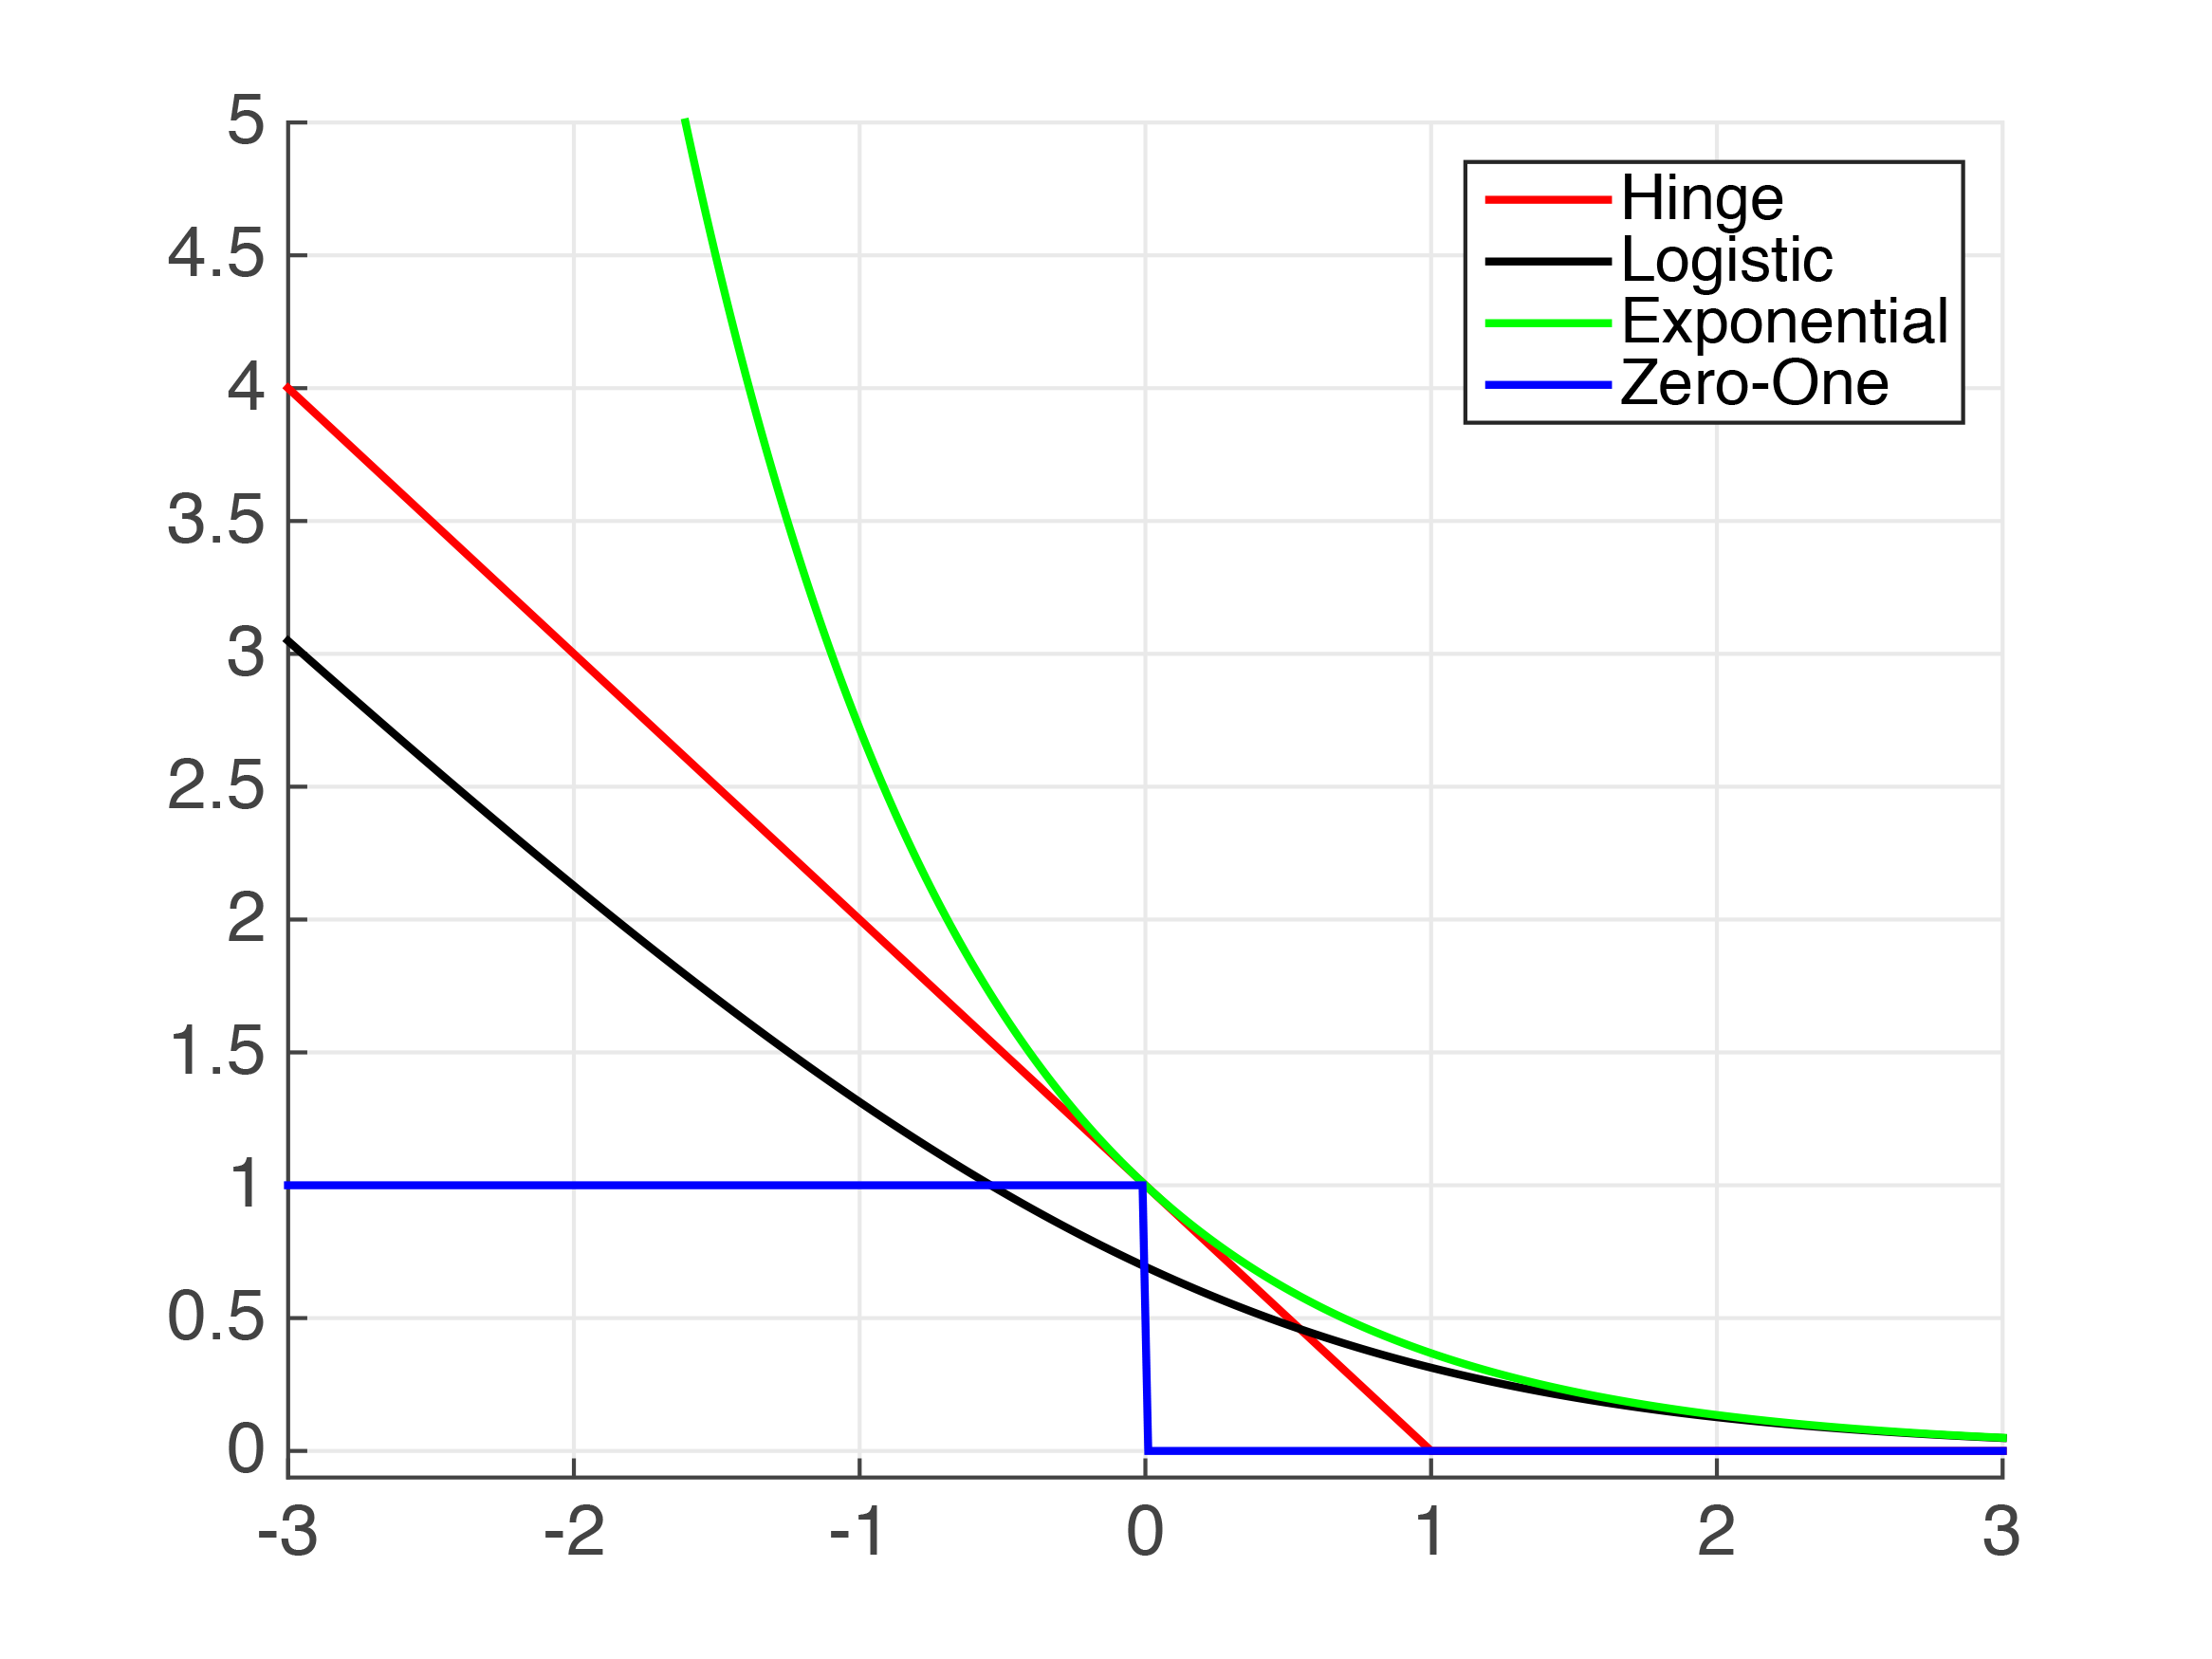

优化算法：

主要是凸优化（KKT条件，拉格朗日对偶），SMO算法。

总结对比一下：

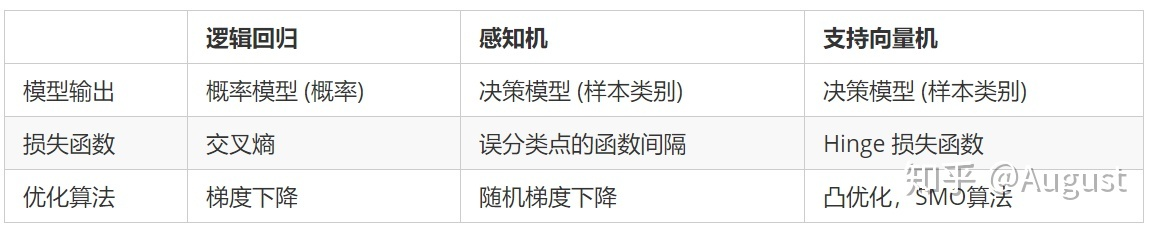

#### 3.2.2 线性支持向量机的公式推导

在感知机和逻辑回归模型找那个，我们希望所有点都里超平面远。这样抓全局真的有必要吗？效果一定好吗？

但是实际上我们只要保证那些离超平面很近的点（这些点很容易被误分类）尽可能远离超平面即可。比如说，小明一家五口（爷爷：75，奶奶：73，爸爸：42，妈妈：40，小明：12），我们想要确定小明家有几个成人，我们只要统计小明的年龄就可以了（前提是小明爷爷奶奶爸爸妈妈都是正常结婚），很显然其他四个人都是成年人，没必要再统计其他人了。

既然SVM的定义是最大间隔分类器，那么我们便会产生如下疑问？

* 这个间隔该如何定义？是什么的最大间隔？
* 如何根据最大间隔求解模型参数？

#### 3.2.2.1 支持向量

这里讲个实际上是支持向量到超平面的间隔。那么什么是支持向量呢？

距离超平面最近的样本点，我们定义为支持向量。如下图所示，黑色实线为超平面，在虚线$H_1$和$H_2$上的点即为支持向量。

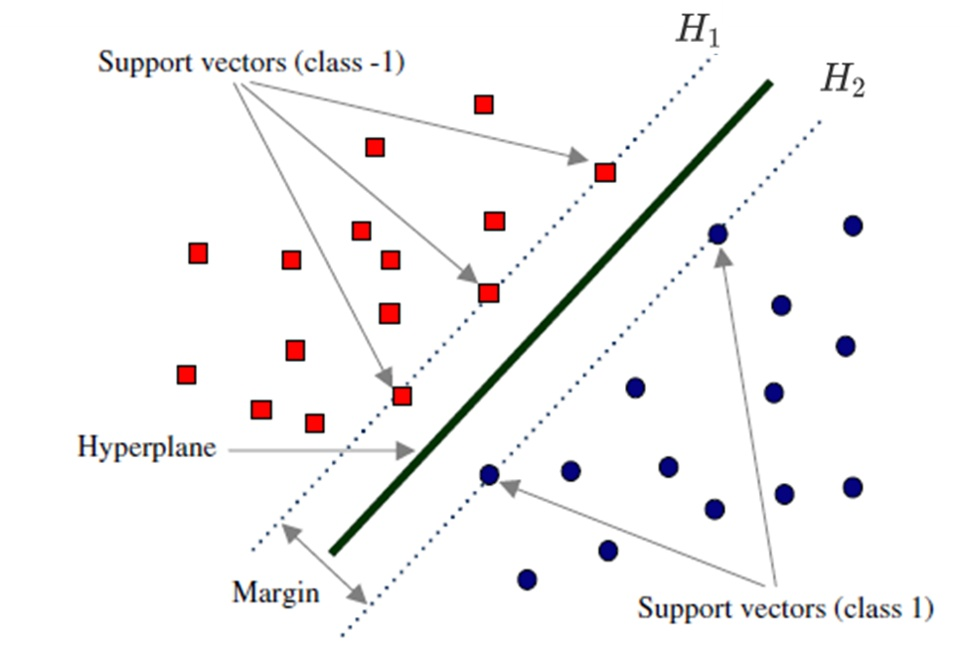

其中，有$H_1$和$H_2$关于超平面对称（因为我们定义了某些点到超平面的距离为$\frac{1}{\|w\|_2}$，这些点都应该在$H_1$和$H_2$超平面上，故而有$H_1$和$H_2$关于超平面对称）。我们在优化超平面参数$w$的时候，也在寻找这些点，当参数$w$固定在某个值时，恰好找到了这些点都在$H_1$和$H_2$超平面上，这时候我们称这些点为支持向量点。进一步思考，$H_1$和$H_2$是随着超平面一同变化的。而我们的样本点在坐标系中是以每个坐标元素表示的，这个坐标点在空间坐标系中以原点为起点，终点为坐标元素所表示的位置，以此连接成的有向线段，我们称之为向量。

参数$w$定了，决策超平面也就定了，超平面定了，支持向量也就定了，优化参数$w$的目的其实也就是找到这些支持向量点，并且这个时候间隔是最大的，优化的目标函数就是最大化间隔，进而优化参数$w$。

#### 3.2.2.2 函数间隔与几何间隔

首先我们定义几何间隔$\gamma$：

$$\gamma = \frac{y(w^Tx + b)}{\|w\|_2}$$

其中$\|w\|_2$为L2范数。

间隔其实就是点到平面的距离：

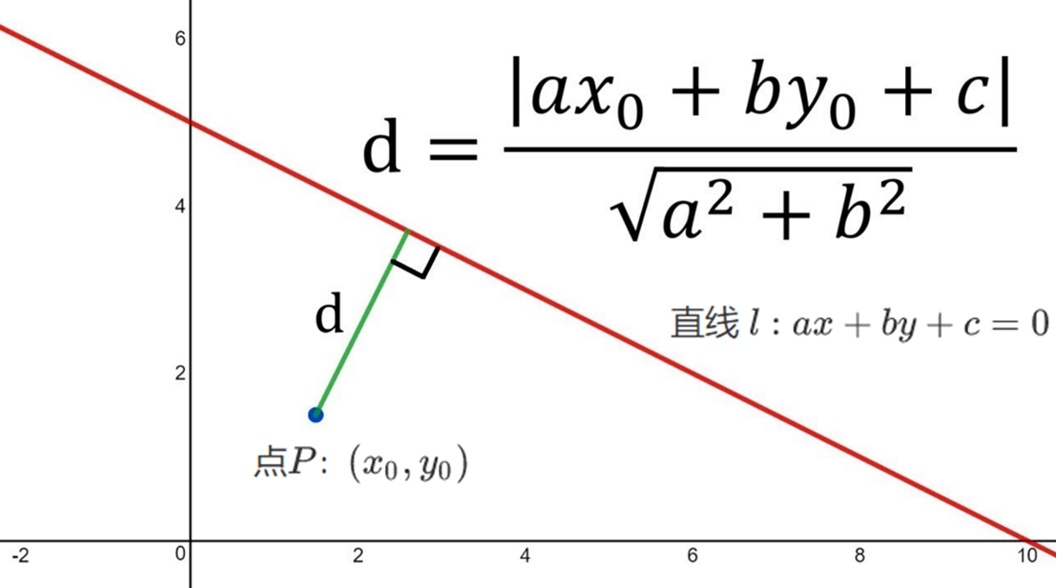

$\gamma = \frac{y(w^Tx + b)}{\|w\|_2}$是点到直线的距离在高维空间中的形式，也称为几何间隔。

而函数间隔$\gamma'$：

$$\gamma' = y(w^Tx + b)$$

其实就是感知机的损失函数，两者存在的关系如下：

$$\gamma = \frac{\gamma'}{\|w\|_2}$$

观察上式，我们有当$\|w\|_2 = 1$时，有$\gamma = \gamma'$，几何间隔即函数间隔。当$\gamma' = 1$时，我们有$\frac{1}{\|w\|_2}$，这个其实就是SVM要优化的目标函数。

我们来看下，分别对参数$w$和$b$同时放大或缩小$C$倍：

我们知道超平面的解析式为：$w^Tx + b = 0$

同时缩放C倍后：$Cw^Tx + Cb = 0$

很显然不会影响超平面的解，超平面也不会发生变化.

再来看下我们的函数间隔，也对它缩放C倍，有：

$\gamma' = y(Cw^Tx + Cb) = Cy(w^Tx + b) = C\gamma'$

函数间隔被缩放了C倍

而几何间隔：

$\gamma = \frac{C\gamma'}{C\|w\|_2} = \gamma$

并没有发生变化。

按上所述感知机并没有使用几何间隔作为其损失函数，而是用的函数间隔，从优化上来讲，几何间隔不易优化求导。另外，几何间隔是相绝对距离，而函数间隔是相对距离，感知机在定义损失时，只要衡量相对距离就能足够了。

#### 3.2.2.3 如何定义最大间隔

SVM模型是让所有点到超平面的距离大于一定的距离，也就是所有的分类点要在各自类别的支持向量两边。我们只要定义支持向量到超平面最大化即可。先上最大间隔的定义：

$$\begin{align*}
\max \hspace{0.3cm} &\frac{2}{\|w\|_2} \\
s.t. \hspace{0.3cm} &y_i(w^Tx_i + b) \ge 1 (i = 1,2,\dots,m)
\end{align*}$$

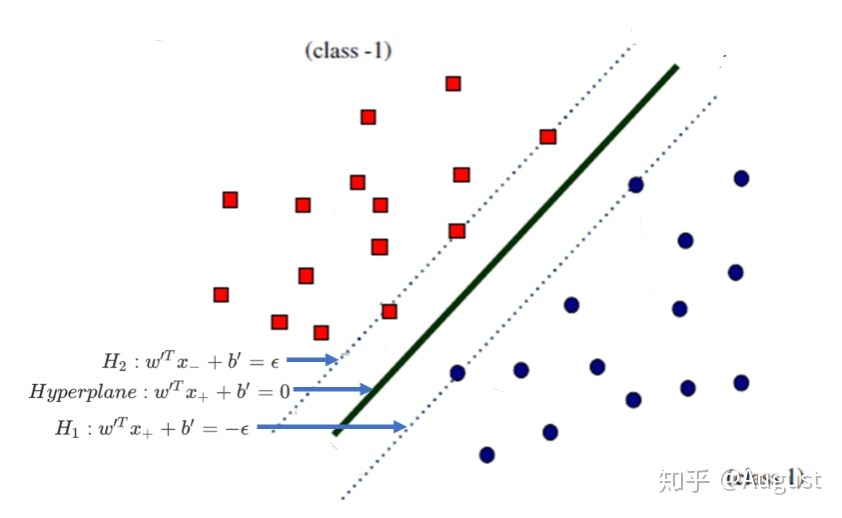

计算图中的$H_1$和$H_2$的间隔

我们定义超平面$H_1$和$H_2$的数学表达式：

$Hyperplane：w'^Tx + b' = 0$

$H_1：w'^Tx_+ + b' = -\epsilon$

$H_2：w'^Tx_- + b' = \epsilon$

方程两边同时除以$\epsilon$，令$w = \frac{w'}{\epsilon}$，$b = \frac{b'}{\epsilon}$，简化方程组我们得到：

$Hyperplane：w^Tx + b = 0$

$H_1：w^Tx_+ + b = -1$

$H_2：w^Tx_- + b = 1$

$H_2 - H_1$得到：

$w^T(x_- - x_+) = 2$

$w$表示的超平面的法向量，$(x_- - x_+)$表示的是沿$x$轴方向的向量，即有两向量的内积，而两向量的内积形式为：

$a \cdot b = a^Tb = \|a\|\|b\|\cos\theta = \|a\|(\|b\|\cos\theta)$

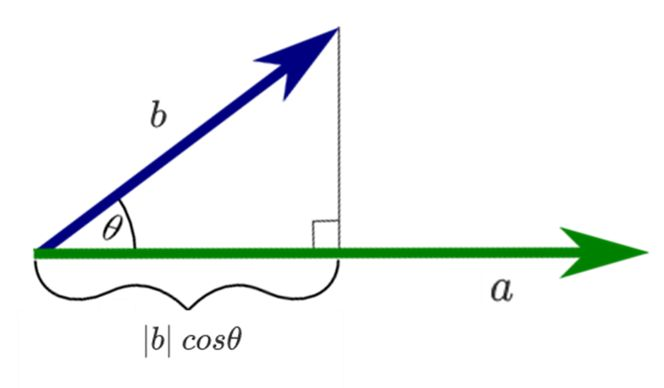

从上面的公式可以推出：

$\|w\|\|x_- - x_+\|\cos\theta = 2$

我们把上面的三角形移植到SVM分类问题中：

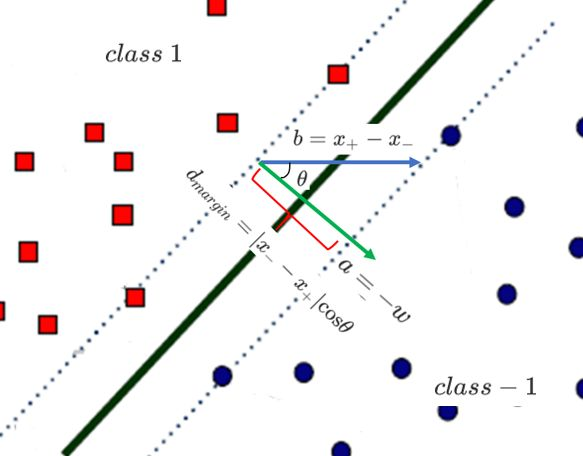

则$d_{margin} = \|x_- - x_+\|\cos\theta$，继续化简：

$\|w\|d_{margin} = 2$

$d_{margin} = \frac{2}{\|w\|_2}$

注意：$\|w\| = \|w\|_2 = \sqrt{w_1^2 + w_2^2 + \dots}$

这样我们就得到了要优化的函数：

$$\begin{align*}
\max \hspace{0.3cm} &\frac{2}{\|w\|_2} \\
s.t. \hspace{0.3cm} &y_i(w^Tx_i + b) \ge 1 (i = 1,2,\dots,m)
\end{align*}$$

也就是说，我们要在约束条件$y_i(w^Tx_i + b) \ge 1 (i = 1,2,\dots,m)$下，最大化$\frac{2}{\|w\|_2}$。翻译成汉语，优化条件：保证其它样本点在$H_1$和$H_2$（支持向量）以外，通俗点就是找其下限，优化目标：最大化支持向量和超平面之间的距离，，也就是最大化下限和决策边界的距离。类似于EM算法里的E步找下限，M步最大化这个下限。

SVM的代价函数等价于：

$$\begin{align*}
\min \hspace{0.3cm} &\frac{1}{2}\|w\|_2^2 \\
s.t. \hspace{0.3cm} &y_i(w^Tx_i + b) \ge 1 (i = 1,2,\dots,m)
\end{align*}$$

回头再来看下几何间隔：

$$\gamma = \frac{y(w^Tx + b)}{\|w\|_2}$$

感知机的代价函数是分母为$1$的几何间隔，SVM的优化函数是分子为$2$几何间隔。同时分子为$2$，在优化函数求导的时候也能够达到简化的目的，可以看下逻辑回归的代价函数：

$$J(\theta) = - \sum y_i\log \widehat{y}_i - (1 - y_i)\log(1 - \widehat{y}_i) + \frac{1}{2}\alpha\|w\|_2^2$$

#### 3.2.3.4 求解最大间隔

线性可分SVM算法的优化过程分为以下几步：

* 转换为拉格朗日函数
* 写成其对偶问题
* 简化对偶问题
* SMO算法求解$\alpha$
* 根据$\alpha$求解出$w$和$b$

**转换为拉格朗日函数**

根据凸优化理论，代价函数满足KKT条件，我们可以通过拉格朗日函数将目标函数转化为无约束的优化函数：

$$\begin{align*}
\min \hspace{0.3cm} &L(w,b,\alpha) = \frac{1}{2}\|w\|_2^2 - \sum_{i=1}^m\alpha_i\left[y_i(w^Tx_i + b) - 1\right] \\
s.t. \hspace{0.3cm} &\alpha_i \ge 0
\end{align*}$$

> 说明：回想一下关于拉格朗日函数从约束问题到非约束问题转换时，不等式的形式为$f_i(x) \le 0$，故而转化形式就变成了$- \sum_{i=1}^m\alpha_i\left[y_i(w^Tx_i + b) - 1\right]$，或者写成$\sum_{i=1}^m\alpha_i\left[1 - y_i(w^Tx_i + b)\right]$。

上式$\frac{1}{2}\|w\|_2^2$可以理解为正则化项，也是间隔倒数优化的目标。

由于引入了拉格朗日函数，加入了拉格朗日乘子$\alpha$，故而我们的优化目标变成了：

$$\underbrace{\min}_{w,b}\underbrace{\max}_{\alpha_i \ge 0}L(w,b,\alpha)$$

**写成其对偶问题**

因这个拉格朗日函数是凸函数，强对偶成立，满足KKT条件，我们可以将拉格朗日函数转换其对偶函数来求解。我们可以先求优化函数对于$w$和$b$的极小值。接着再求拉格朗日乘子$\alpha$的极大值，即：

$$\underbrace{\max}_{\alpha_i \ge 0}\underbrace{\min}_{w,b}L(w,b,\alpha)$$

**简化对偶问题**

首先来求$w$和$b$的极小值，即$\underbrace{\min}_{w,b}L(w,b,\alpha)$。这个极值我们可以通过对$w$和$b$分别求偏导得到：

$$\frac{\partial L}{\partial w} = 0 \Rightarrow w^* = \sum_{i=1}^m\alpha_iy_ix_i$$
$$\frac{\partial L}{\partial b} = 0 \Rightarrow \sum_{i=1}^m\alpha_iy_i = 0$$

将上式带入函数$L(w,b,\alpha)$消掉$w$，进而可以定义：

$\Psi(\alpha) = \underbrace{\max}_{\alpha_i \ge 0}L(w,b,\alpha)$

替换成$\Psi(\alpha)$的表达式

我们将上述信息整理下：

* 首先我们需要知道公式中的$w$和$x$均为向量，$\alpha$和$b$为实数
* $\|\mathbf{w}\|_2^2 = \mathbf{w}^T\mathbf{w}$
* 根据上面推导：$\mathbf{w} = \sum_{i=1}^m\alpha_iy_ix_i$
* 根据向量运算的分配率：$\sum_{i=1}^m\alpha_iy_i\mathbf{w}^Tx_i = \mathbf{w}^T\sum_{i=1}^m\alpha_iy_ix_i$
* 提取常数项：$\sum_{i=1}^m\alpha_iy_ib = b\sum_{i=1}^m\alpha_iy_i$
* 根据上面推导：$\sum_{i=1}^m\alpha_iy_i = 0$
* $-\frac{1}{2}\left(\sum_{i=1}^m\alpha_iy_ix_i\right)^T\left(\sum_{i=1}^m\alpha_iy_ix_i\right) = -\frac{1}{2}\sum_{i=1}^m\alpha_iy_ix_i^T\sum_{i=1}^m\alpha_iy_ix_i$
* $\begin{align*}
\sum_{i=1}^ma_i * \sum_{i=1}^mb_i &= (a_1 + a_2 + a_3 + \dots)(b_1 + b_2 + b_3 + \dots) \\
&=a_1b_1 + a_1b_2 + \cdots + a_2b_1 + a_2b_2 + \cdots \\
&=\sum_{i=1,j=1}^ma_ib_j
\end{align*}$

接下来对其进行化简：

$$\begin{align*}
\Psi(\alpha) &=\frac{1}{2}\|w\|_2^2 - \sum_{i=1}^m\alpha_i\left[y_i(w^Tx_i + b) - 1\right] \\
&=\frac{1}{2}w^Tw - \sum_{i=1}^m\alpha_iy_iw^Tx_i - \sum_{i=1}^m\alpha_iy_ib + \sum_{i=1}^m\alpha_i \\
&=\frac{1}{2}w^T\sum_{i=1}^m\alpha_iy_ix_i - \sum_{i=1}^m\alpha_iy_iw^Tx_i - \sum_{i=1}^m\alpha_iy_ib + \sum_{i=1}^m\alpha_i \\
&=\frac{1}{2}w^T\sum_{i=1}^m\alpha_iy_ix_i - w^T\sum_{i=1}^m\alpha_iy_ix_i - \sum_{i=1}^m\alpha_iy_ib + \sum_{i=1}^m\alpha_i \\
&=-\frac{1}{2}w^T\sum_{i=1}^m\alpha_iy_ix_i + \sum_{i=1}^m\alpha_i \\
&=-\frac{1}{2}\left(\sum_{i=1}^m\alpha_iy_ix_i\right)^T\left(\sum_{i=1}^m\alpha_iy_ix_i\right) + \sum_{i=1}^m\alpha_i \\
&=-\frac{1}{2}\sum_{i=1}^m\alpha_iy_ix_i^T\sum_{i=1}^m\alpha_iy_ix_i + \sum_{i=1}^m\alpha_i \\
&=-\frac{1}{2}\sum_{i,j=1}^m\alpha_iy_ix_i^T\alpha_jy_jx_j + \sum_{i=1}^m\alpha_i
\end{align*}$$

通过上面可以看出，通过对$w,b$极小化后，我们的优化函数$\Psi(\alpha)$仅仅只有$\alpha$向量做参数。只要我们能够极大化$\Psi(\alpha)$，就可以求出此时对应的$\alpha$，进而求出$w,b$

对偶问题的简化结果如下：

$$\begin{align*}
\underbrace{\max}_{\alpha} \hspace{0.3cm} &-\frac{1}{2}\sum_{i,j=1}^m\alpha_iy_ix_i^T\alpha_jy_jx_j + \sum_{i=1}^m\alpha_i \\
s.t. \hspace{0.3cm} &\sum_{i=1}^m\alpha_iy_i = 0 \\
&\alpha_i \ge 0 \hspace{0.1cm} i = 1,2,\dots,m
\end{align*}$$

去掉负号，等价为极小化问题如下：

$$\begin{align*}
\underbrace{\min}_{\alpha} \hspace{0.3cm} &\frac{1}{2}\sum_{i,j=1}^m\alpha_iy_ix_i^T\alpha_jy_jx_j - \sum_{i=1}^m\alpha_i \\
s.t. \hspace{0.3cm} &\sum_{i=1}^m\alpha_iy_i = 0 \\
&\alpha_i \ge 0 \hspace{0.1cm} i = 1,2,\dots,m
\end{align*}$$

**SMO算法求解$\alpha$**

只要我们可以求出上式极小化对应的$\alpha$向量就可以求出$w,b$了（需要用到SMO算法）。在这里，假设已经通过SMO算法求得$\alpha$对应的极值$\alpha^*$。

**根据$\alpha$求解出$w$和$b$**

我们根据$w = \sum_{i=1}^m\alpha_iy_ix_i$，可以求出对应的$w$的值

$$w^* = \sum_{i=1}^m\alpha_iy_ix_i$$

在求出$b$就行了。注意到，对应支持向量$(x_s,y_s)$都有

$y_s(w^{*T}x_s + b) = 1$

将$w^* = \sum_{i=1}^m\alpha_iy_ix_i$带入上式可以得到：

$y_s(\sum_{i=1}^m\alpha_i^*y_ix_i^Tx_s + b) = 1$

求得：

$b_s^* = y_s - \sum_{i=1}^m\alpha_i^*y_ix_i^Tx_s$

> 说明：化简时，我们有$\frac{1}{y_s} = y_s$，以$y_s$的取值为$\pm 1$

假设我们有$S$个支持向量，则对应可以求出$S$个$b_s^*$，然后将其平均值作为最后的结果。

> 说明：在求解$w^*$时，是用到了训练样本中的每个样本，但是由条件$\alpha_i = 0$和$\alpha_i(y_i(w^Tx_i + b) - 1) = 0$，得到$y_i(w^Tx_i + b) > 1$是非支持向量点，其实这些点并没有参与计算，只有$y_i(w^Tx_i + b) = 1$这些支持向量点参与了计算，进而简化了计算量；而在求取$b_s^*$，固然也只用这些支持向量点，但是从公式中可以看出每次求取只有一个支持向量点参与，所以只能求取所有的情况并最后取平均。

> 说明：若取$\alpha_i$和$y_i(w^Tx_i + b) - 1$同时为0，则$w^*$为0，$b = y_s = \pm{1}$，继而有超平面$0\cdot x + b = 0$，得到$\pm{1}= 0$相矛盾的结论，故而不能同时为0。

#### 3.3 线性可分SVM的算法过程

输入是$m$个线性可分的样本$(x_1,y_1),(x_2,y_2),\dots,(x_m,y_m)$，其中$x$为$n$维特征向量，$y$为二元分类结果$1$或$-1$。

输出是分离超平面的参数$w^*$和$b^*$的分类决策函数

算法过程如下：

1. 构造代价函数：

$$\begin{align*}
\underbrace{\min}_{\alpha} \hspace{0.3cm} &\frac{1}{2}\sum_{i,j=1}^m\alpha_iy_ix_i^T\alpha_jy_jx_j - \sum_{i=1}^m\alpha_i \\
s.t. \hspace{0.3cm} &\sum_{i=1}^m\alpha_iy_i = 0 \\
&\alpha_i \ge 0 \hspace{0.1cm} i = 1,2,\dots,m
\end{align*}$$

2. 用SMO算法求出$\alpha$向量的值$\alpha^*$

3. 计算$w^* = \sum_{i=1}^m\alpha_iy_ix_i$

4. 找出所有的$S$个支持向量$(x_s,y_s)$，计算出每个支持向量$(x_s,y_s)$对应的$b_s^*$，取平均得到$b$，继而得到最终的分类超平面为：$w^{*T}x + b^* = 0$。最终的分类决策函数为：$f(x) = sign(w^{*T}x + b^*)$

#### 3.4 最大软间隔支持向量机

#### 3.4.1 线性分类SVM面临的问题

如下图为线性可分的数据集，可以采用线性可分的支持向量机，也称为硬间隔支持向量机。

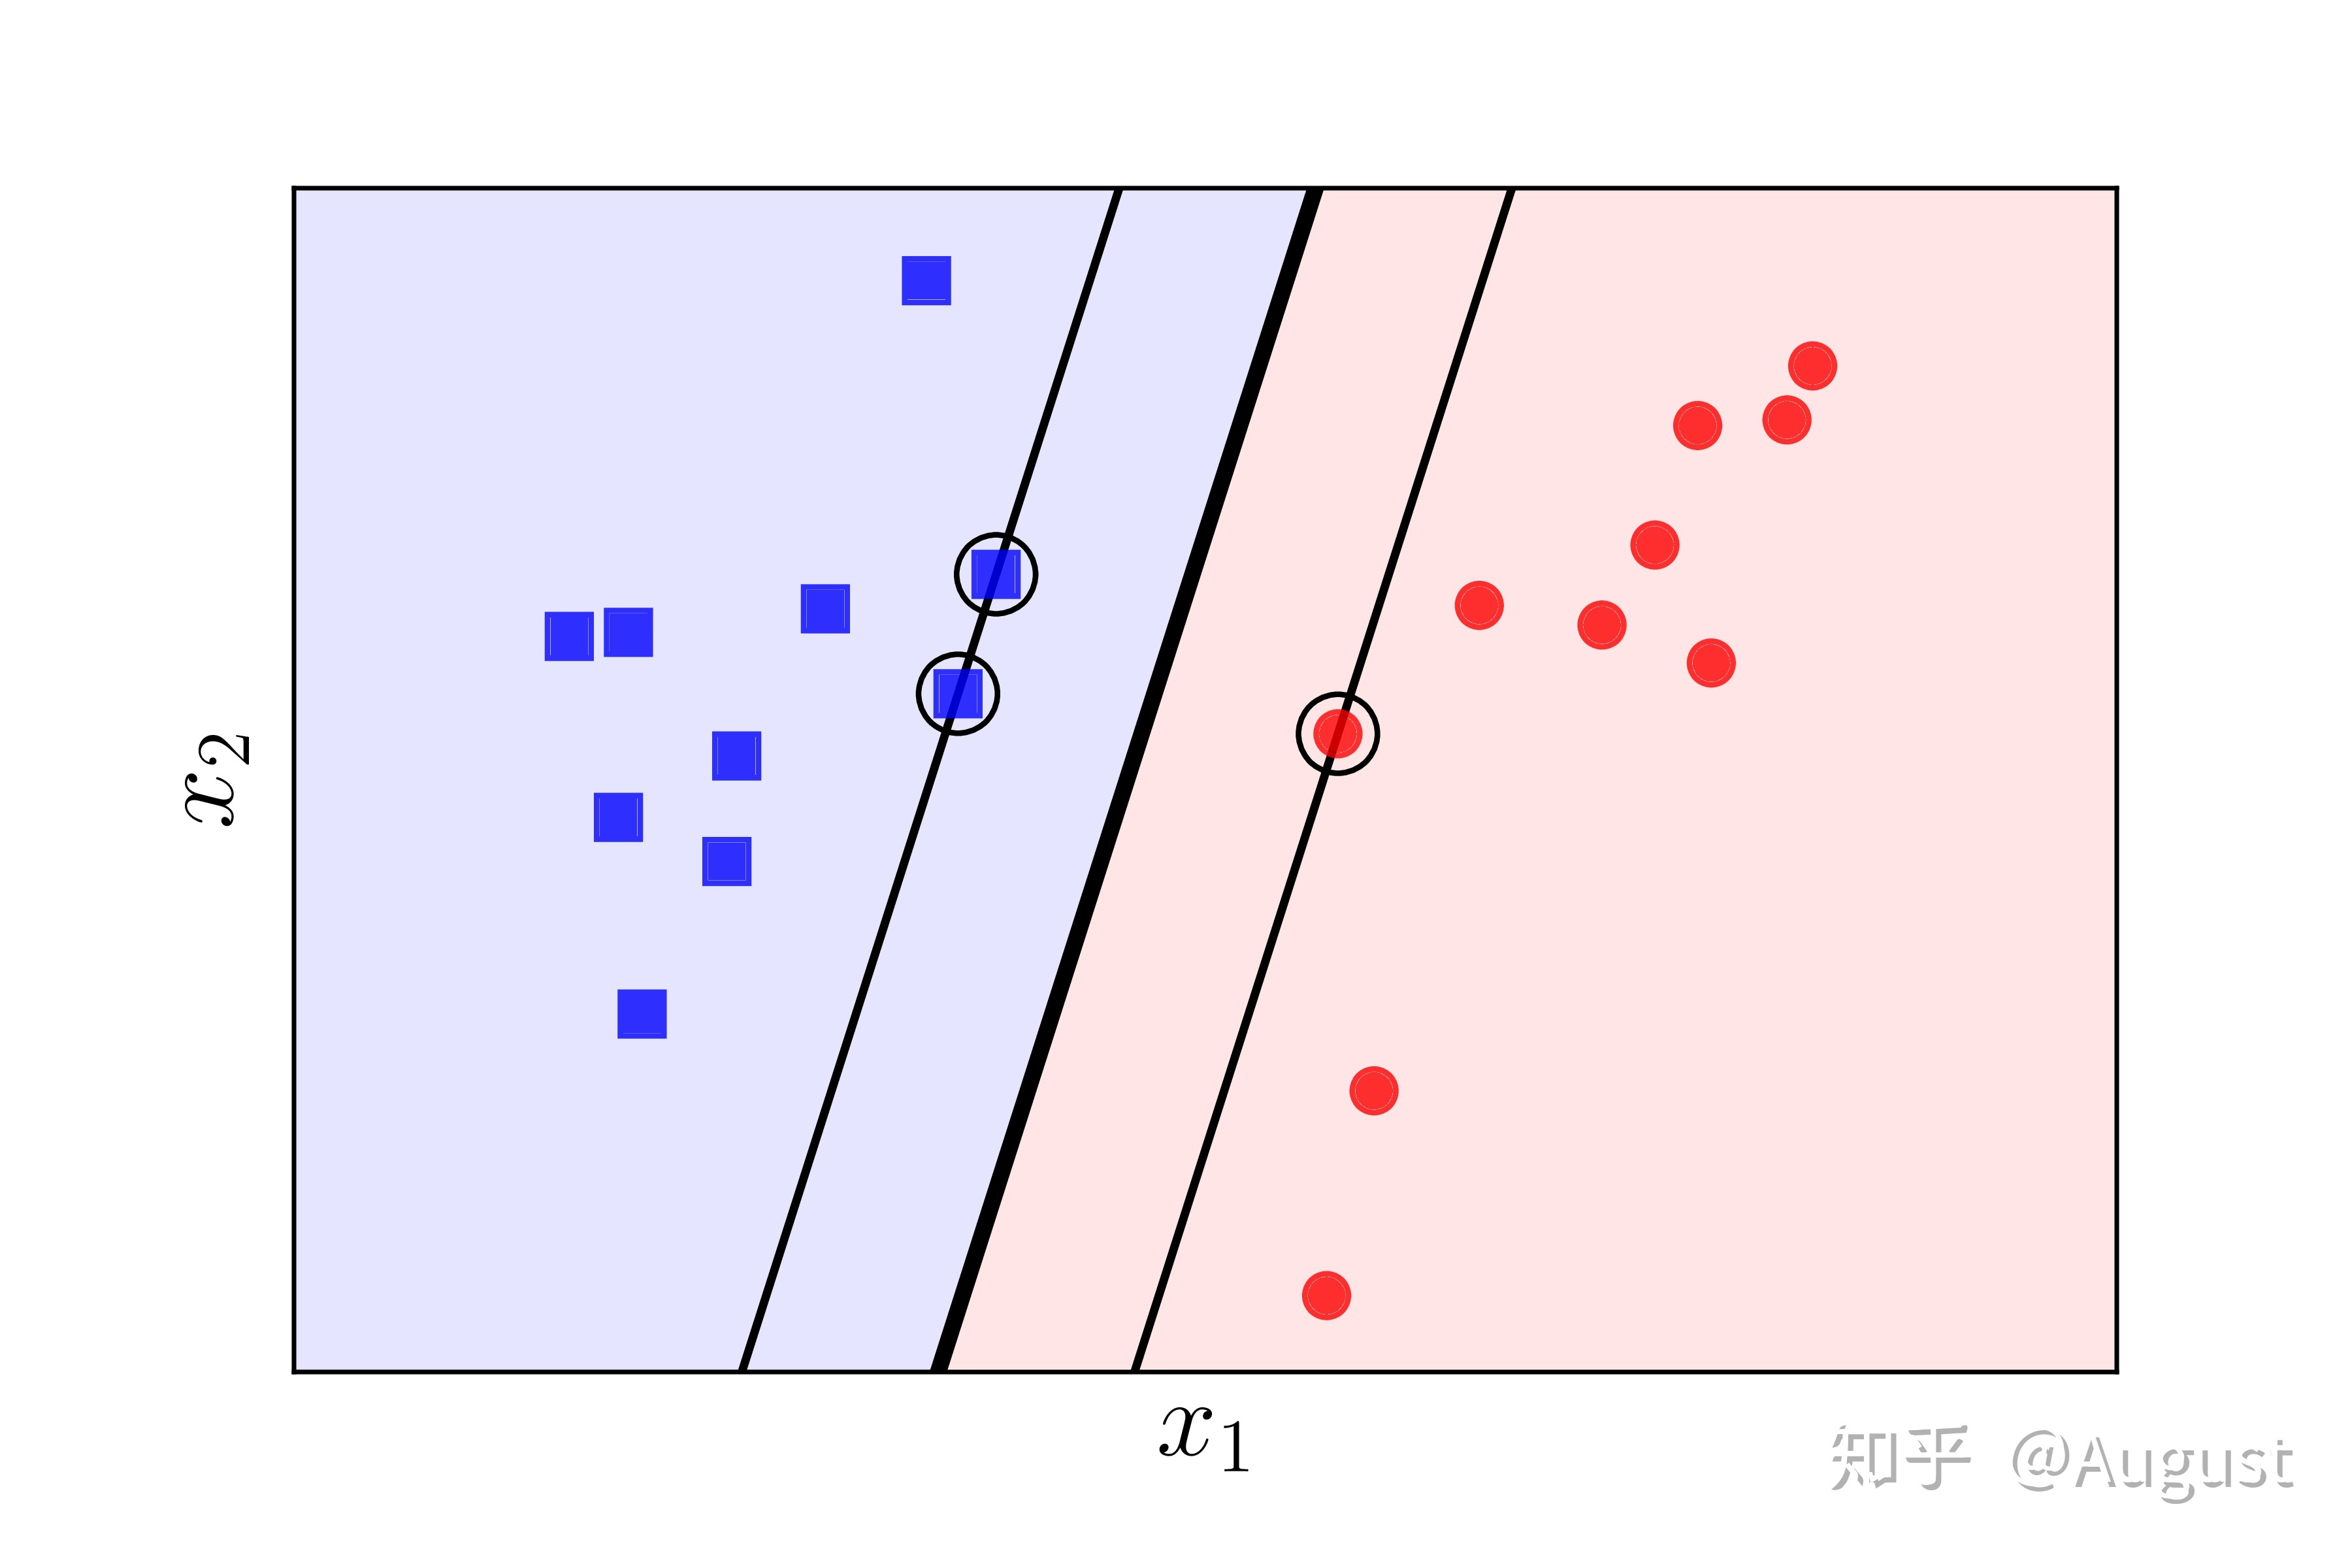

当数据中掺杂了一些噪声，如下图所示，由于掺杂了一个红色的噪声点，导致模型学习到的决策边界由下图中的粗虚线移动到了粗实线。

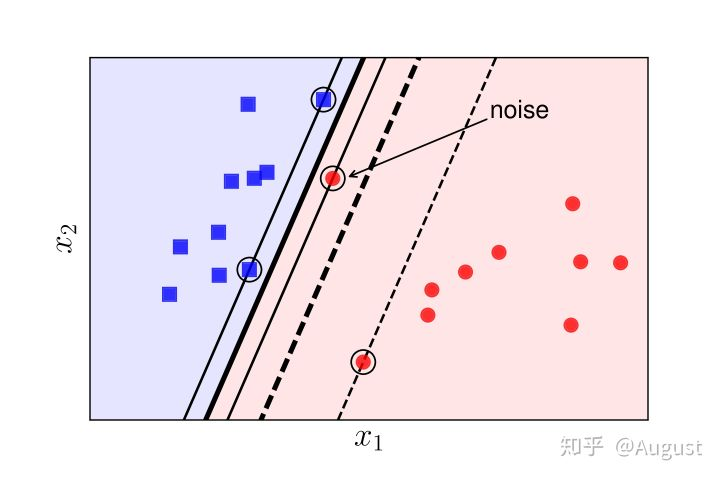

显然上图中使用粗虚线作为决策边界更合理，模型更具有泛化能力，粗实线的决策边界只是在当前训练数据集中表现良好。

#### 3.4.2 软间隔SVM

回顾下最大硬间隔SVM：

$$\begin{align*}
\min \hspace{0.3cm} &\frac{1}{2}\|w\|_2^2 \\
s.t. \hspace{0.3cm} &y_i(w^Tx_i + b) \ge 1 (i = 1,2,\dots,m)
\end{align*}$$

硬间隔SVM借鉴了EM算法的思想，包含两个核心步骤：找到支持向量（样本下限），然后最大化支持向量间隔（最小化下限）。下面我们就这两个方面看看软间隔是怎样从硬间隔过度而来的。

**下限有什么变化**

让我们回顾下硬间隔支持向量机，如下图所示：

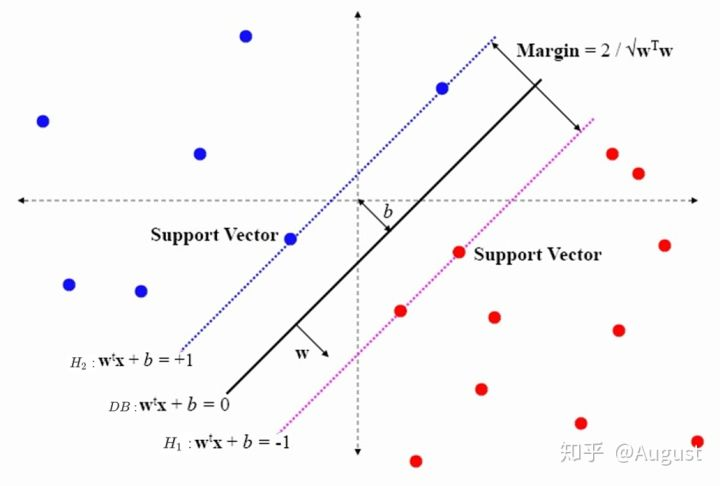

所有的样本点到决策超平面的距离均不小于1，硬间隔SVM的下限为：

$$y_i(w^Tx_i + b) \ge 1$$

$H_1$和$H_2$像两堵墙一样将两类样本分隔开

当数据中增加噪声点或误分类后，比如在$H_1$和$H_2$之间，SVM引入了一个神奇的变量$\xi_i \ge 0$，这个变量被称为松弛变量，其几何含义由下图所示：

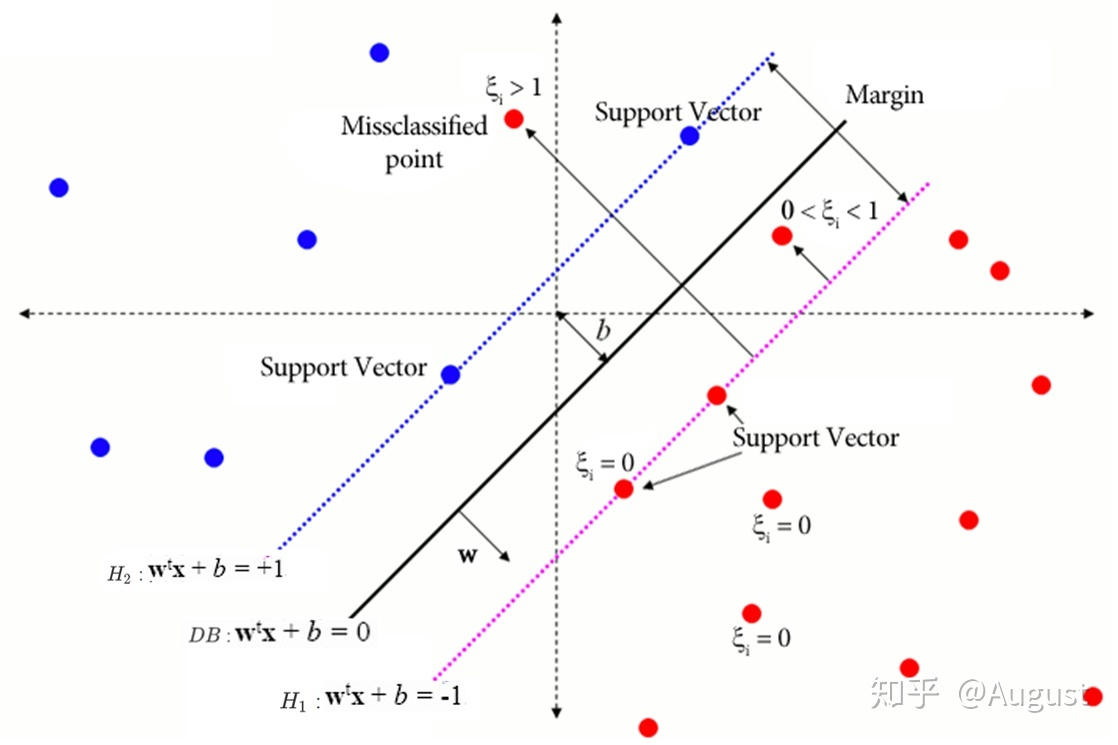

现以红色样本点为例，$\xi$表示到$H_1$的距离：

当样本点在$H_1$右边时，包括支持向量和支持向量以外的样本点时$\xi_i = 0$，即我们可以按照硬间隔来处理。对于$H_1$左侧的样本点，样本的$\xi > 0$，包括两种情况，一种是正确分类，但是在$margin$范围内的样本点（也就是超平面附件的点），此时$0 < \xi < 1$；一类是误分类的点，此时$\xi > 1$。

对于噪声点和误分类样本点来说，$1 - \xi$表示该样本点到决策超平面的距离，而且是有向距离。具体而言，噪声点到超平面的距离为$0 < 1 - \xi < 1$，误分类点到超平面的距离为$1 - \xi < 0$。

加入松弛变量$\xi$之后，我们的$H_1$和$H_2$像弹簧一样，这对不同的样本点做不同的处理，变“软”了。写成数学公式为：

$$y_i(w^Tx_i + b) \ge 1 - \xi_i, \hspace{0.3cm} \xi_i \ge 0$$

那么如何根据样本点做相应的调整呢？

**怎样优化下限？**

我们知道，只要我们伸缩弹簧，就会消耗能量，付出代价。同理松弛变量的添加也是有成本的，每个松弛变量$\xi_i$都支付了一个代价$\xi_i$，现在代价函数变成了：

$$\min \hspace{0.3cm} \frac{1}{2}\|w\|_2^2 \Rightarrow \min \hspace{0.3cm} \frac{1}{2}\|w\|_2^2 + C\sum_{i=1}^m\xi_i$$

> 说明：我们要伸缩超平面，那付出的代价就是加上一个松弛变量

这个公式的原理还是不够明了，让我们还原一下，看看这个到底是什么意思。由：

$$\min \hspace{0.3cm} \frac{1}{2}\|w\|_2^2 \Rightarrow \max \hspace{0.3cm} \frac{2}{\|w\|_2^2}$$
$$\min \hspace{0.3cm} \frac{C}{m}\sum_{i=1}^m\xi_i \Rightarrow \max \hspace{0.3cm} \frac{C}{m}\sum_{i=1}^m(1 - \xi_i)$$

显然对于支持向量和支持向量以外的点，$\max \hspace{0.3cm} \frac{2}{\|w\|_2^2}$，相当于最大化$margin$。$\max \hspace{0.3cm} \frac{C}{m}\sum_{i=1}^m(1 - \xi_i)$对于$margin$内的噪声点，最大化噪声和决策边界之间的距离$1 - \xi_i$；对于误分类的点，其到决策边界之间的距离为$-(1 - \xi_i)$，那么$\max \hspace{0.3cm} \frac{C}{m}\sum_{i=1}^m(1 - \xi_i) \Rightarrow \min \hspace{0.3cm} |C\sum_{i=1}^m(1 - \xi_i)|$，也就是最小化误分类点到决策边界之间的距离，通俗点讲就是尽量不要让其错得那么离谱。

**综合起来看一下**

综合起来，我们就得到了最大化软间隔SVM的优化目标：

$$\begin{align*}
\min \hspace{0.3cm} &\frac{1}{2}\|w\|_2^2 + \frac{C}{m}\sum_{i=1}^m\xi_i \\
s.t. \hspace{0.3cm} &y_i(w^Tx_i + b) \ge 1 - \xi_i \hspace{0.1cm} (i=1,2,\dots,m) \\
&\xi_i \ge 0 \hspace{0.1cm} (i=1,2,\dots,m)
\end{align*}$$

最小化$\frac{1}{2}\|w\|_2^2$意味着让支持向量距离超平面的距离尽可能大，最小化$\sum_{i=1}^m\xi_i$意味着保证$margin$内的点尽可能远离超平面，对误分类点不要偏离的太远。$C$是协调两者关系的系数，需要调参来选择。

> 说明：参数$C$协调$margin$间距、噪声点和误分类点间的关系的，确保$margin$内的点尽量远，误分类点不要偏的太远，间距尽可能大。

下面是取不同的$C$值得分类器对比情况，这两种分类器的性能相差不大，都比较差。$C$越小，$margin$越大，$C$越大，$margin$越小。$C$越大，$\sum_{i=1}^m\xi_i$作用越大，模型会更多得关注噪声点和误分类点，即决策边界周围的点，$C$越小，模型会更多关注距离决策边界更远的点，当$C = 0$时，软间隔变成了硬间隔。$C$的取值可以采用交叉验证的方式求得。

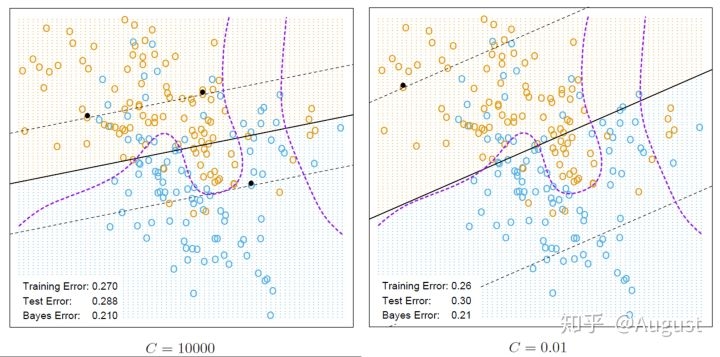

> 说明：参数$w$的优化，可以理解为分隔超平面的斜率，$w$越小，超平面越向x轴倾斜，且同时间隔会被拉大，这个时候为了保证间隔内的点和误分类点最优，就得加上一个更大的力量来拉回这间隔，也就是通过调整参数$C$，$C$越大，拉回的间隔也就越多，间隔也就变得越小，这时候保证间隔最优的同时，间隔内点和误分类点也是最优的。也可以使用上面的方法来理解，通过调整$C$参数，表示模型的侧重。

对于硬间隔和软间隔的理解，下面我们举一个更形象的例子。比如我们要用SVM来划分金庸武侠里的任务性别。

对于《射雕英雄》，《神雕侠侣》，《倚天屠龙》，《天龙八部》等小说中的任务，性格鲜明，不存在噪声点和误分类点，显然硬间隔SVM就能较好区分这一类小说中人物的性别。

然而，对于《笑傲江湖》，由于葵花宝典的这部神奇的变性秘笈，可以将男人变成女人（典型的如“东方姑娘”）出现了我们所说的噪声点和误分类点，这样我们就必须采用软间隔SVM。具体可以把里面的角色分为以下几类，对于令狐冲，任盈盈，岳灵珊等人，很显然，他们性格鲜明，我们可以把他们归为$\xi = 0$的人群里面（支持向量还没有想到是谁，恒山派和少林派？）。对于岳不群，林平之这种噪声点，我们可以把他们划分到$margin$中去，即$0 < \xi < 1$，对于东方不败（徐克版和于正版的东方不败都直接启用林青霞和陈乔恩扮演，而且还和令狐冲谈起了恋爱），很显然“她”属于误分类点，即$\xi > 1$。而我们的代价函数是用来做什么呢？是让令狐冲，任盈盈，岳灵珊等人的性别更加鲜明，男的更Man，女的更Woman；让岳不群，林平之尽量靠向男人这一方；让“东方姑娘”不要太Woman了。

影响软间隔的决策超平面也只有支持向量，并不包含噪声和误分类点，以此防止过拟合。

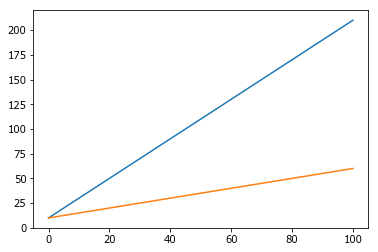

In [4]:
import numpy as np
import matplotlib.pyplot as plt

w1 = 2
w2 = 0.5
b = 10

x = np.linspace(0,100)
y1 = w1 * x + b
y2 = w2 * x + b

plt.plot(x,y1)
plt.plot(x,y2)

#### 3.4.3 软间隔SVM优化算法

和线性可分SVM的优化方式类似，优化过程分为以下几步：

* 转化为拉格朗日函数
* 转化为对偶问题
* 简化对偶函数
* SMO算法求解$\alpha$
* 根据$\alpha$求解出$w$和$b$

**转化为拉格朗日函数**

根据凸优化理论，代价函数满足KKT条件，我们可以通过拉格朗日函数将目标函数转化为无约束的优化函数：

$$\min \hspace{0.3cm} L(w,b,\xi,\alpha,\mu) = \frac{1}{2}\|w\|_2^2 + C\sum_{i=1}^m\xi_i - \sum_{i=1}^m\alpha_i\left[y_i(w^Tx_i + b) - 1 + \xi_i\right] - \sum_{i=1}^m\mu_i\xi_i$$

其中$\mu_i \ge 0, \alpha_i \ge 0$，均为拉格朗日系数。

我们的优化目标变成了：

$$\underbrace{\min}_{w,b,\xi}\underbrace{\max}_{\alpha_i \ge 0,\mu_i \ge 0}L(w,b,\alpha,\xi,\mu)$$

**转换对偶函数**

因这个拉格朗日函数是凸函数，强对偶成立，满足KKT条件，我们可以将拉格朗日函数转换其对偶函数来求解。即：

$$\underbrace{\max}_{\alpha_i \ge 0,\mu_i \ge 0}\underbrace{\min}_{w,b,\xi}L(w,b,\alpha,\xi,\mu)$$

**简化对偶函数**

首先我们对参数$w,b,\xi$求偏导得到其极小值：

$$\frac{\partial L}{\partial w} = 0 \Rightarrow w^* = \sum_{i=1}^m\alpha_iy_ix_i$$
$$\frac{\partial L}{\partial b} = 0 \Rightarrow \sum_{i=1}^m\alpha_iy_i = 0$$
$$\frac{\partial L}{\partial \xi} = 0 \Rightarrow C - \alpha_i - \mu_i = 0$$

我们可以利用上面的三个等式来消除$w,b$和$C$。

将$C = \alpha_i + \mu_i$带入式子，并进行化简：

$$\begin{align*}
L(w,b,\xi,\alpha,\mu) &= \frac{1}{2}\|w\|_2^2 + C\sum_{i=1}^m\xi_i - \sum_{i=1}^m\alpha_i\left[y_i(w^Tx_i + b) - 1 + \xi_i\right] - \sum_{i=1}^m\mu_i\xi_i \\
&= \frac{1}{2}\|w\|_2^2 - \sum_{i=1}^m\alpha_i\left[y_i(w^Tx_i + b) - 1 + \xi_i\right] + \sum_{i=1}^m\alpha_i\xi_i \\
&= \frac{1}{2}\|w\|_2^2 - \sum_{i=1}^m\alpha_i\left[y_i(w^Tx_i + b) - 1\right]
\end{align*}$$

而上式化简的式子又恰好是硬间隔的代价函数。

故而进一步求导化简，得到：

$$\begin{align*}
\underbrace{\max}_{\alpha} \hspace{0.3cm} &\sum_{i=1}^m\alpha_i  - \frac{1}{2}\sum_{i,j=1}^m\alpha_iy_ix_i^T\alpha_jy_jx_j \\
s.t. \hspace{0.3cm} &\sum_{i=1}^m\alpha_iy_i = 0 \\
&C - \alpha_i\mu_i = 0 \\
&\alpha_i \ge 0, \mu_i \ge 0 \hspace{0.1cm} i = 1,2,\dots,m
\end{align*}$$

对于$C - \alpha_i - \mu_i = 0, \alpha_i \ge 0, \mu_i \ge 0$这三个式子进行化简，得到最终结果：

$$\begin{align*}
\underbrace{\min}_{\alpha} \hspace{0.3cm} &\frac{1}{2}\sum_{i,j=1}^m\alpha_iy_ix_i^T\alpha_jy_jx_j - \sum_{i=1}^m\alpha_i \\
s.t. \hspace{0.3cm} &\sum_{i=1}^m\alpha_iy_i = 0 \\
& 0 \le \alpha_i \le C \hspace{0.1cm} i = 1,2,\dots,m
\end{align*}$$

软间隔代价函数和硬间隔代价函数相比，对$\alpha$的限制更加严格。而支持向量最大化方式不变。

**SMO算法求解$\alpha$**

只要我们可以求出上式极小化对应的$\alpha$向量就可以求出$w$和$b$（需要用到SMO算法）。在这里，我们假设通过SMO算法已经得到$\alpha$对应的极值$\alpha^*$

**根据$\alpha$求解出$w$和$b$**

那么我们根据$w = \sum_{i=1}^m\alpha_iy_ix_i$可以求出对应的$w$的值：

$$w^* = \sum_{i=1}^m\alpha_iy_ix_i$$

再求出$b$就行了。注意到，对于支持向量都有：

$y_s(w^{*T}x_s + b) = 1$

将$w^* = \sum_{i=1}^m\alpha_iy_ix_i$带入上式可以得到：

$y_s(\sum_{i=1}^m\alpha_i^*y_ix_i^Tx_s + b) = 1$

求得：

$b_s^* = y_s - \sum_{i=1}^m\alpha_i^*y_ix_i^Tx_s$

假设我们有$S$个支持向量，则对应可以求出$S$个$b_s^*$，然后将其平均值作为最后的结果。

如何求出支持向量、噪声点和误分类点？

在硬间隔最大化时，根据KKT条件中的对偶互补条件$\alpha_i^*(y_i(w^Tx_i =b) -1) = 0$。

* 如果$\alpha_i > 0$，则有$y_i(w^Tx_i + b) = 1$即点在支持向量上
* 如果$\alpha_i = 0$，则有$y_i(w^Tx_i + b) > 1$，即样本已经被正确分类。

软间隔最大化时KKT条件中的对偶互补条件包含两个：

$$\alpha_i^*(y_i(w^Tx_i =b) -1 + \xi_i^*) = 0$$
$$\mu_i\xi_i = 0 \Rightarrow (C - \alpha_i)\xi_i = 0$$

我们有：

* 如果$\alpha = 0$，那么$\xi_i = 0$，$y_i(w^Tx_i + b) - 1 > 0$，即样本已经被正确分类。
* 如果$0 < \alpha < C$，那么$\xi_i = 0$，$y_i(w^Tx_i + b) - 1 = 0$，即该点为支持向量。
* 如果$\alpha = C$，说明要么是噪声点，要么是误分类点，需要检查此时$\xi_i$

    * 如果$0 < \xi_i < 1$，该点被正确分类，但是却在超平面和自己类别的支持向量之间。
    * 如果$\xi_i = 1$，该点在分离超平面上，无法被正确分类。
    * 如果$\xi_i > 1$，该店就是误分类的点。
    
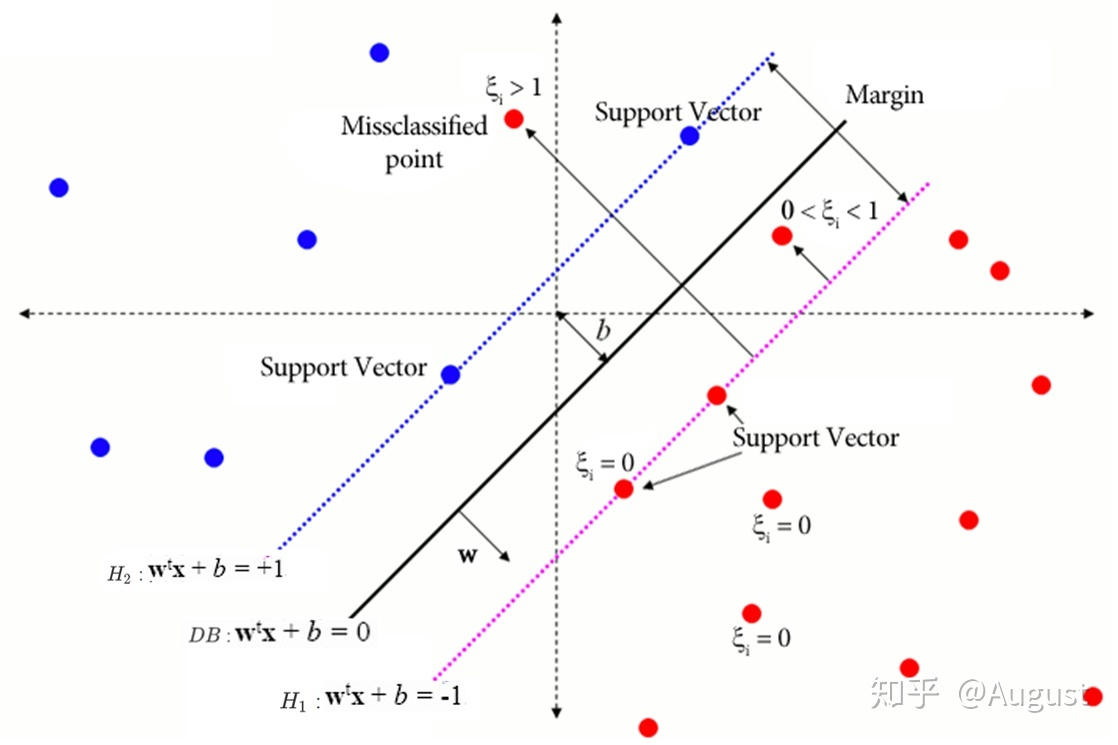

> 说明：软间隔通过引进$\xi$这个松弛变量使得满足噪声点和误分类点的情况，同时通过调整参数$C$来使得模型偏向优化最大间隔或优化噪声点和误分类点。

其实，我们可以通过以下空间划分来说明（以红色样本点为例）：

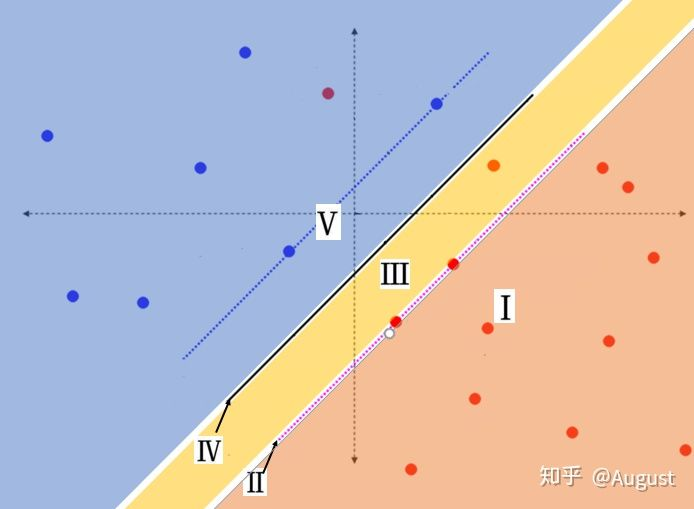

其中

* $\alpha = 0$对应Ⅰ
* $0 < \alpha < C$对应Ⅱ
* $\alpha = C$对应Ⅲ + Ⅳ + Ⅴ
* $\alpha = C$且$0 < \xi_i < 1$对应Ⅲ
* $\alpha = C$且$\xi_i = 1$对应 Ⅳ
* $\alpha = C$且$\xi_i = 1$对应 Ⅴ

#### 3.4.4 最大软间隔SVM的算法总结

输入是$m$个线性可分的样本$(x_1,y_1),(x_2,y_2),\dots,(x_m,y_m)$，其中$x$为$n$维特征向量，$y$为二元分类结果$1$或$-1$。

输出是分离超平面的参数$w^*$、$b^*$和分类决策函数。

算法过程如下：

1. 构造代价函数：

$$\begin{align*}
\underbrace{\min}_{\alpha} \hspace{0.3cm} &\frac{1}{2}\sum_{i,j=1}^m\alpha_iy_ix_i^T\alpha_jy_jx_j - \sum_{i=1}^m\alpha_i \\
s.t. \hspace{0.3cm} &\sum_{i=1}^m\alpha_iy_i = 0 \\
& 0 \le \alpha_i \le C \hspace{0.1cm} i = 1,2,\dots,m
\end{align*}$$

2. 用SMO算法求出$\alpha$向量的值$\alpha^* = (\alpha_1^*,\alpha_2^*,\dots,\alpha_N^*)$

3. 计算$w^* = \sum_{i=1}^m\alpha_i^*y_ix_i$

4. 找出所有满足$0 < \alpha^* \le C$的所有$\alpha^*$分量，求得$b_s^*$

$$b^* = y_j - \sum_{i=1}^N\alpha_i^*y_i(x_i^Tx_j)$$

取平均得到$b$。

5. 最终的分类决策函数为：

$$f(x) = sign(w^{*T}x + b^*) = sign(\sum_{i=1}^m\alpha_i^*y_i(x_i^Tx) + b^*)$$

#### 3.4.5 SVM损失函数详解

总结一下，关于线性支持向量机我们学了三种代价函数：

* 合页损失函数（Hinge Loss Function）:

$$\min \hspace{0.3cm} \frac{1}{m}\sum_{i=1}^m\max\{0,1 - y_i(w^Tx_i  + b)\} + \frac{\lambda}{2}\|w\|_2^2$$

* 硬间隔损失函数：

$$\begin{align*}
\min \hspace{0.3cm} &\frac{1}{2}\|w\|_2^2 \\
s.t. \hspace{0.3cm} &y_i(w^Tx_i + b) \ge 1 \hspace{0.1cm} (i=1,2,\dots,m)
\end{align*}$$

* 软间隔损失函数：

$$\begin{align*}
\min \hspace{0.3cm} &\frac{1}{2}\|w\|_2^2 + \frac{C}{m}\sum_{i=1}^m\xi_i \\
s.t. \hspace{0.3cm} &y_i(w^Tx_i + b) \ge 1 - \xi_i \hspace{0.1cm} (i=1,2,\dots,m) \\
&\xi_i \ge 0 \hspace{0.1cm} (i=1,2,\dots,m)
\end{align*}$$

其实归根到底都是合页损失函数。

**推导如下**

* 对于硬间隔损失函数：

由以下条件：

$$y_i(w^Tx_I + b) \le 1 \Rightarrow 1 - y_i(w^Tx_i + b)$$

可得：

$$\max\{0,1 - y_i(w^Tx_i  + b)\}$$
$$\frac{1}{m\lambda}\sum_{i=1}^m\max\{0,1 - y_i(w^Tx_i  + b)\}$$

则：

$$\begin{align*}
\min \hspace{0.3cm} \frac{1}{2}\|w\|_2^2 + \sum_{i=1}^m\alpha_i\left[1 - y_i(w^Tx_i + b)\right] &= \min \hspace{0.3cm} \frac{1}{2}\|w\|_2^2 + \frac{1}{m\lambda}\sum_{i=1}^m\max\{0,1 - y_i(w^Tx_i  + b)\} \\
&= \min \hspace{0.3cm} \frac{1}{\lambda}(\frac{1}{m}\sum_{i=1}^m\max\{0,1 - y_i(w^Tx_i  + b)\} + \frac{\lambda}{2}\|w\|_2^2)
\end{align*}$$

* 对于软间隔损失函数

由以下两个条件：

$$y_i(w^Tx_i + b) \le 1 - \xi_i \Rightarrow \xi_i \ge 1 - y_i(w^Tx_i + b)$$
$$\xi_i \ge 0$$

合并为：

$$\xi_i \ge \max\{0,1 - y_i(w^Tx_i  + b)\}$$

得到$\xi_i$的下限$\xi_i \ge \max\{0,1 - y_i(w^Tx_i  + b)\}$，翻译成公式为：

$$\min \hspace{0.3cm} \xi_i = \max\{0,1 - y_i(w^Tx_i  + b)\}$$

$$\begin{align*}
\min \hspace{0.3cm} \frac{1}{2}\|w\|_2^2 + \frac{C}{m}\sum_{i=1}^m\xi_i &= \min \hspace{0.3cm} \frac{1}{2}\|w\|_2^2 + \frac{C}{m}\sum_{i=1}^m\max\{0,1 - y_i(w^Tx_i  + b)\} \\
&=C(\min \hspace{0.3cm} \frac{1}{2C}\|w\|_2^2 + \frac{1}{m}\sum_{i=1}^m\max\{0,1 - y_i(w^Tx_i  + b)\})
\end{align*}$$

令$C = \frac{1}{\lambda}$即可证得。

如下图中的绿线：如果点被正确分类，且在支持向量以外，损失为0，否则损失是$1 - y(w \cdot x + b)$。如果点呗正确分类，且在$margin$之内，损失为小于1的小数；如果点被分类错误，损失函数大于1，且随样本到超平面距离的增大，损失函数增大。

从下图中我们还可以看出其它各种模型损失和函数间隔的关系：

对于0-1损失函数，如下图黑线，如果正确分类，损失是0，误分类损失为1，且0-1损失函数是不可导的。
对于感知机模型，感知机的损失函数是$[-y_i(w \cdot x + b)]_+$，如下图紫线，当样本被正确分类时，损失是0，误分类时，损失是$-y_i(w \cdot x + b)$

对于逻辑回归和最大熵模型对应的对数损失，损失函数是$\log[1 + exp(-y(w \cdot x + b))]$，如下图红线所示：

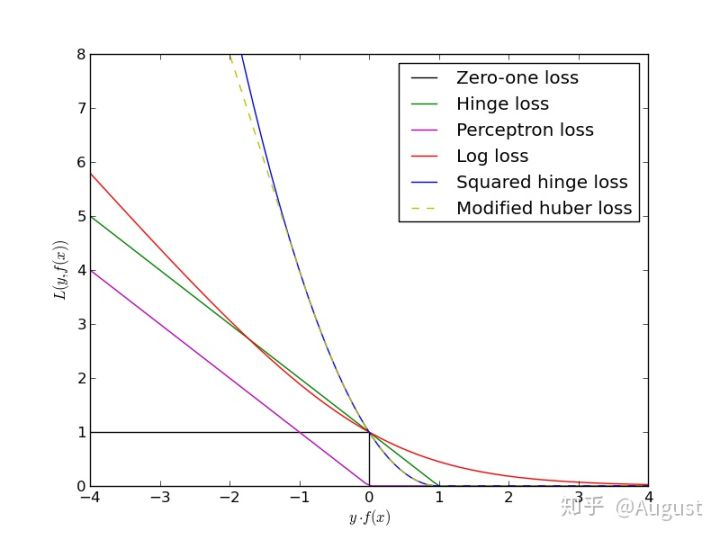

#### 3.5 非线性支持向量机与核函数

#### 3.5.1 核函数的引入

以上介绍的都是SVM作为线性分类器的作用，那对于非线性问题，SVM该如何做呢？

对于非线性问题，我们采取的做法是将进行一个非线性变换映射到特征空间中，将原空间非线性问题转变为特征空间的线性问题，然后再用线性分类器SVM求解。我们举例说明：

图中的两类数据，分别分布为两个圆圈的形状，因为这样的数据本身就是线性不可分的，线性分类器是无法处理。那我们该如何处理呢？

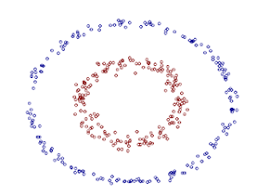

对于上图的数据，我们可以表示为：

$a_1X_1^2 + a_2(X_2 - c)^2 + a_3 = 0$

其中$X_1$和$X_2$是两个坐标系。

我们令$Z_1 = X_1^2, Z_2 = X_2^2, Z_3 = X_2$（其中$Z_1,Z_2,Z_3$为三维空间的三个坐标）将其映射到三维空间中进行求解，如下图：

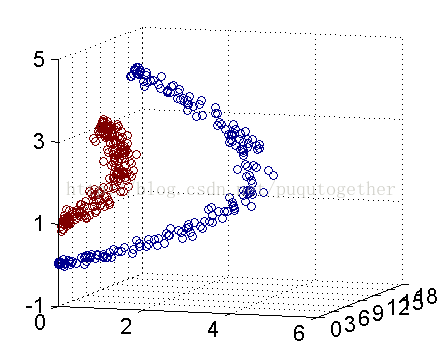

可以找到一个平面，将红色的样本和蓝色样本区分开。

下图展示了另一种特征映射和线性分类相结合的方式：

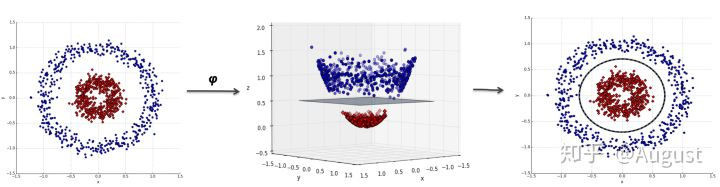

再如下图：

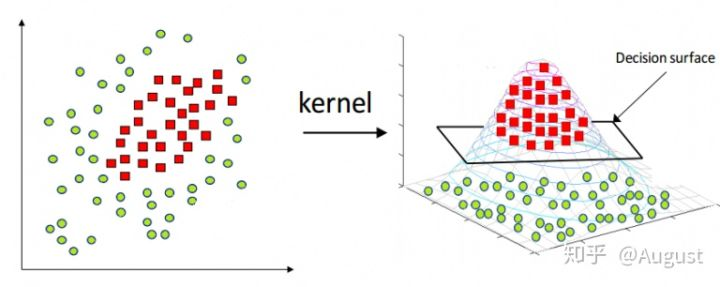

也就是说对于在低维线性不可分的数据，在映射到高维以后，就变成线性可分了。这个思想我们同样可以运用到SVM线性不可分数据上。也就是说，对于不可分的低维特征数据，我们可以将其映射到高维，就可以运用线性可分SVM进行求解。

> 说明：此处说的线性不可分，指的是不能使用线性模型在低维度进行分隔，并不等于不可分，我们可以使用非线性模型，但是这种模型优化起来计算量很大，比较复杂，所以我们可以思想将其升维，进而简化模型的计算量且能够达到线性可分的要求。

特征变换除了在SVM中的应用，其实在整个机器学习界都都其身影。

机器学习处理分类和回归问题就是特征变换。对于分类问题，输入空间为$n$维特征空间，输出只有0，-1和1的一维空间。对于回归问题，输出空间$n$维特征空间，输出为连续的一维向量。这是高维空间转换为一维空间的情况。

对于熟悉深度学习的，$w^Tx + b$为特征空间的线性变换，激活函数为特征空间的非线性变换（空间扭曲）。

我们可以将这种思想应用到SVM算法上。回顾线性可分SVM的优化目标函数：

$$\begin{align*}
\underbrace{\max}_{\alpha} \hspace{0.3cm} &\sum_{i=1}^m\alpha_i  - \frac{1}{2}\sum_{i,j=1}^m\alpha_i\alpha_jy_iy_j(x_i^T \cdot x_j) \\
s.t. \hspace{0.3cm} &\sum_{i=1}^m\alpha_iy_i = 0 \\
&C - \alpha_i\mu_i = 0 \\
&\alpha_i \ge 0, \mu_i \ge 0 \hspace{0.1cm} i = 1,2,\dots,m
\end{align*}$$

注意，$(x_i^T \cdot x_j)$为点积（内积）的形式，对于任意两个向量$x$和$y$，$x^Ty = x \cdot y$始终成立。

我们定义一个低维特征空间到高维特征空间的映射$\phi$，将所有输入空间映射到一个更高维度的特征空间，让数据线性可分，我们就可以利用SVM的优化目标函数求出分类决策边界。也就是说现在的SVM优化函数变成：

$$\begin{align*}
\underbrace{\max}_{\alpha} \hspace{0.3cm} &\sum_{i=1}^m\alpha_i  - \frac{1}{2}\sum_{i,j=1}^m\alpha_i\alpha_jy_iy_j\left[\phi{(x_i)} \cdot \phi{(x_j)}\right] \\
s.t. \hspace{0.3cm} &\sum_{i=1}^m\alpha_iy_i = 0 \\
&C - \alpha_i\mu_i = 0 \\
&\alpha_i \ge 0, \mu_i \ge 0 \hspace{0.1cm} i = 1,2,\dots,m
\end{align*}$$

可以看到，和线性可分SVM的优化目标函数的区别仅仅是将内积$x_i \cdot x_j$替换为$\phi{(x_i)} \cdot \phi{(x_j)}$。

得到的超平面即为：

$$f(x) = sign(\sum_{i=1}^m\alpha_i^*y_i(\phi{(x_i)} \cdot \phi{(x)}) + b^*)$$

我们发现在SVM算法求解中$\phi(x)$并不是单独存在的，而是始终以$\phi{(x_i)} \cdot \phi{(x_j)}$的形式出现，以此我们定义一个新的函数：

$$\mathcal{K}(x,z) = \phi{(x)} \cdot \phi{(z)}$$

> 说明：对于原空间中的只关注$x_i$与$x$内积的结果，而经过特征变换后，依然是$\phi{(x_i)}$和$\phi{(x)}$的内积，我们并不关注特征变换函数本身，所以我们是否可以找到这样的函数，保持在原空间的计算量的同时，并且能够达到在新空间的线性可分的目的呢，答案是肯定的。其实就是核函数。

下面我们来看下官方是如何定义核函数的：

假设$\phi$是一个从低维输入空间$\mathcal{X}$（欧式空间的子集或者离散集合）到高维的希尔伯特空间$\mathcal{H}$的映射。对于所有的$x,z ∈ \mathcal{X}$，都有$\mathcal{K}(x,z)$满足：

$$\mathcal{K}(x,z) = \phi{(x_i)} \cdot \phi{(x_j)}$$

那么我们就称$\mathcal{K}(x,z)$为核函数，$\phi{(x)}$为映射函数。

在SVM里我们使用了核函数的核技巧来解决高维运算问题。

> 说明：我们在原空间求解内积时，可以通过多种方法求解其结果值，方法一，直接在原空间计算；方法二，映射到高维空间，直接使用高维特征映射函数计算，这边的高维可以是递增维，也就是说可能有无数个这样的特征映射满足要求，但就其想要达到的结果和计算量考量，当然选取小计算量的特征映射函数啦！

维度递增，特征空间会呈爆炸式增长，带来的计算量也是非常庞大的，甚至到无穷维。

至此，我们总结下线性不可分时核函数的引入过程：

我们在遇到线性不可分的样例时，常用做法就是把样例特征映射到高维空间中，但这个时候维度大小会成为问题，通常采用核函数的核技巧来解决这类问题。核函数能够在低维进行计算，其实现的效果仍能够表现在高维的分类上，以此避免了直接在高维空间中的复杂计算。

#### 3.5.2 核函数的介绍

从上面的分析发现，我们只需要定义核函数$\mathcal{K}(x,z)$，而不用显式的定义映射函数$\phi$，即可求出$\phi(x_i) \cdot \phi(x_j)$，这样就省去了寻找映射函数的麻烦（映射函数有无数个）。但我们又该如何定义核函数呢？

#### 3.5.2.1 线性核函数

线性核函数其实就是线性可分SVM，表达式为：

$$\mathcal{K}(x,z) = x \cdot z$$

也就是说，线性SVM是非线性SVM的一个特殊情况，即线性SVM使用的就是线性核函数。

#### 3.5.2.2 多项式核函数

多项式核函数是线性不可分SVM常用的核函数之一，表达式为：

$$\mathcal{K}(x,z) = (\gamma x \cdot z + r)^p$$

相当于将原始空间映射到$p$维空间，其中，$\gamma,r,p$都需要调参。

#### 3.5.2.3 高斯核函数

高斯核函数也称为径向基核函数（RBF），它是非线性分类SVM最主流的核函数。表达式为：

$$\mathcal{K}(x,z) = exp(-\gamma\|x - z\|^2)$$

相当于将原始空间映射到无穷维空间。其中，非负参数$\gamma$需要调参。

#### 3.5.2.4 Sigmoid核函数

Sigmod核函数也是线性不可分SVM常用的核函数之一，表达式：

$$\mathcal{K}(x,z) = tanh(\gamma x \cdot z + r)$$

其中，$\gamma,r$都需要子集调参定义。

#### 3.5.3 分类SVM的算法过程

现在我们对分类SVM的算法过程做一个总结，不再区别是否线性可分。

输入是$m$个线性可分的样本$(x_1,y_1),(x_2,y_2),\dots,(x_m,y_m)$，其中$x$为$n$维特征向量，$y$为二元分类结果$1$或$-1$。

输出是分离超平面的参数$w^*$、$b^*$和分类决策函数。

算法过程如下：

1. 选择合适的核函数$\mathcal{K}(x,z)$和一个惩罚系数$C > 0$，构造约束优化代价函数：

$$\begin{align*}
\underbrace{\min}_{\alpha} \hspace{0.3cm} &\frac{1}{2}\sum_{i,j=1}^m\alpha_i\alpha_jy_iy_j\mathcal{K}(x_i,x_j) - \sum_{i=1}^m\alpha_i \\
s.t. \hspace{0.3cm} &\sum_{i=1}^m\alpha_iy_i = 0 \\
& 0 \le \alpha_i \le C \hspace{0.1cm} i = 1,2,\dots,m
\end{align*}$$

2. 用SMO算法求出$\alpha$向量的值$\alpha^* = (\alpha_1^*,\alpha_2^*,\dots,\alpha_N^*)$

3. 计算$w^* = \sum_{i=1}^m\alpha_i^*y_ix_i$

4. 找出所有满足$0 < \alpha^* < C$的所有$\alpha^*$分量，求得$b_s^*$

$$b^* = y_j - \sum_{i=1}^N\alpha_i^*y_i\mathcal{K}(x_i,x_j)$$

取平均得到$b$。

5. 最终的分类决策函数为：

$$f(x) = sign(w^{*T}x + b^*) = sign(\sum_{i=1}^m\alpha_i^*y_i\mathcal{K}(x_i,x)+ b^*)$$

#### 3.6 SMO (序列最小优化) 算法原理

#### 3.6.1 回顾SVM优化目标

我们首先回顾下SVM的目标函数：

$$\begin{align*}
\underbrace{\min}_{\alpha} \hspace{0.3cm} &\frac{1}{2}\sum_{i,j=1}^m\alpha_i\alpha_jy_iy_j\mathcal{K}(x_i,x_j) - \sum_{i=1}^m\alpha_i \\
s.t. \hspace{0.3cm} &\sum_{i=1}^m\alpha_iy_i = 0 \\
& 0 \le \alpha_i \le C \hspace{0.1cm} i = 1,2,\dots,m
\end{align*}$$

向量$\alpha$是拉格朗日算子，每个样本$(x_i,y_i)$都对应一个向量分量$\alpha_i$。

根据上节课我们需要先求解$\alpha$，然后根据$\alpha$再求解分类决策函数的参数$w$和$b$。SMO算法的作用就是高效求解参数向量$\alpha$的值$\alpha^* = (\alpha_1^*,\alpha_2^*,\dots,\alpha_m^*)$。

KKT约束条件：

$$\alpha_i^* = 0 \Rightarrow y_ih(x_i) > 1$$
$$0 < \alpha_i^* < C \Rightarrow y_ih(x_i) = 1$$
$$\alpha_i^* = C \Rightarrow y_ih(x_i) < 1$$

其中$h(x) = w^* \cdot \phi(x) + b = \sum_{j=1}^m\alpha_j^*y_j\mathcal{K}(x_i,x_j) + b^*$为预测值。

#### 3.6.2 SMO算法的基本思想

SMO是微软研究院的John C. Platt在《Sequential Minimal Optimization：A Fast Algorithm for Training Support Vector Machine》一文中提出的，其基本思想是：把含有$m$个参数的原始问题分解成多个子问题分别求解，每个子问题只需要求解两个参数，这样SMO算法就将一个复杂的优化问题转换为一个比较简单的两变量优化问题。每次启发式选择两个变量进行优化，不断循环，知道达到函数最优值。

下面我们具体来讲解一下。

* 假设第一次迭代所选的两个变量是$\alpha_{i1},\alpha_{j1}$，则$\alpha_1,\dots,\alpha_{i1 - 1},\alpha_{i1 + 1},\dots,\alpha_{j1 -1},\alpha_{j1 + 1},\dots,\alpha_m$视为常数。
* 通过极小化目标函数求解$\alpha_{i1} = \alpha_{i1}^{(1)}, \alpha_{j1} = \alpha_{j1}^{(1)}$，更新参数向量的$\alpha$的值为$\alpha_1,\dots,\alpha_{i1}^{(1)},\dots,\alpha_{j1}^{(1)},\alpha_m$。
* 更新假设函数的参数$b$。
* 进入第二轮迭代，选择两个变量为$\alpha_{i2},\alpha_{j2}$，则$\alpha_1,\dots,\alpha_{i2 - 1},\alpha_{i2 + 1},\dots,\alpha_{j2 -1},\alpha_{j2 + 1},\dots,\alpha_m$视为常数。
* 通过极小化目标函数求解$\alpha_{i2} = \alpha_{i2}^{(2)}, \alpha_{j2} = \alpha_{j2}^{(2)}$，更新参数向量的$\alpha$的值为$\alpha_1,\dots,\alpha_{i2}^{(2)},\dots,\alpha_{j2}^{(2)},\alpha_m$。
* 更新假设函数的参数$b$。
* 不断循环迭代，直到达到目标函数最优值。

为什么要使用两个变量进行优化，而不采用一个变量，三个变量，四个变量...？

假设采用一个变量，比如说$\alpha_1$，即意味着其它$m - 1$个参数视为常数，可以看成关于$\alpha_1$的一元函数求解。但是由于约束条件$\sum_{i=1}^m\alpha_iy_i = 0$，当其它$m - 1$个参数为常数时，参数$\alpha_1 = -y_1\sum_{i=2}^my_i\alpha_i$也被固定，意味着$m$个参数均视为常数，故而不能采用一个变量。
采用两个变量，比如$\alpha_1$和$\alpha_2$，其它$m - 2$个参数视为常数，那么根据$\sum_{i=1}^m\alpha_iy_i = 0$可以用$\alpha_1$来表示$\alpha_2$，即$\alpha_2 = y_2\sum_{i=3}^m\alpha_iy_i - \alpha_1y_1y_2$，将一个二变量$(\alpha_1,\alpha_2)$的优化转化为单变量$(\alpha_1)$的优化问题，从而简化了问题。
加入采用三个变量，四个变量，属于多变量优化问题，问题的复杂度还是很大。

以上我们了解了SMO算法的基本思想，SMO的第一步需要选择两个变量，那么怎样选择这两个变量呢？

#### 3.6.3 SMO算法两个变量的选择

和梯度下降类似，SMO算法选择变量的原则是使得目标函数下降的最快。具体该怎么操作呢？

其实，我到没有真正想过应该选择怎样的两个变量！

#### 3.6.3.1 第一个变量的选择 

第一个变量$\alpha_1$的选择也称为外循环，这个变量需要选择距离真实值（最终收敛结果）最离谱的变量$\alpha_1$，也就是违反KKT约束条件最严重的样本点。

对于每个样本点，要满足的KKT条件我们上面已经讲到：

$$\alpha_i^* = 0 \Rightarrow y_ih(x_i) > 1$$
$$0 < \alpha_i^* < C \Rightarrow y_ih(x_i) = 1$$
$$\alpha_i^* = C \Rightarrow y_ih(x_i) < 1$$

一般我们会先选择对SVM决策超平面结果影响最大的支持向量，也就是约束条件$0 < \alpha_i^* < C \Rightarrow y_ih(x_i) = 1$。如果这些支持向量都满足KKT条件，再选择违反其它条件的点。

#### 3.6.3.2 第二个变量的选择

第二个变量$\alpha_2$的选择也称为内循环，假设我们在外层循环已经找到了$\alpha_1$，$\alpha_2$的选择标准需要满足$\alpha_2$变化最大，即$\mid E_1 - E_2 \mid$对应的$\alpha_2$（其中$E_i = \widehat{y}_i - y_i$，即预测值和真实值之间的差值）。

> 说明：第一个变量选择的是最离谱的变量$\alpha_1$，而第二个变量是使得变化最快的$\alpha_2$。选择的依据也很合符常理，都是为了使得减小整个迭代所用的时间，使得算法快速收敛。

但我们如何理解采用$\mid E_1 - E_2 \mid$作为衡量$\alpha_2$变化最快的标准呢？

从这个标准式子出发，当$\alpha_1$定了，$E_1$也就确定了，要想$\mid E_1 - E_2 \mid$最大，当$E_1$为正时，选择最小的$E_i$作为$E_2$，而在$E_1$为负，选择最大的$E_i$作为$E_2$，可以将所有的$E_i$保存下来加快迭代。

更新两个差别更大的变量，比起更新两个相似的变量，可能整体用的时间要少很多。

如果内循环找到的点不能让目标函数有足够的下降，可以采用以下步骤：

* 遍历支持向量点来做$\alpha_2$，直到目标函数有足够的下降；
* 如果所有的支持向量点都不能使得目标函数有足够的下降，可以在整个样本集上选择$\alpha_2$；
* 如果整个样本集依然不存在，则调回外层循环重新选择$\alpha_1$。

其实，是先固定$\alpha_1$，再找$\alpha_2$，思想依然是EM思想。

#### 3.6.4 SMO算法优化求解

假设我们通过上述方法得到了两个变量$\alpha_1$和$\alpha_2$，那么

$$\sum_{i=1}^m\alpha_iy_i = 0 \Rightarrow \alpha_1y_1 + \alpha_2y_2 = -\sum_{i=3}^my_i\alpha_i = \varsigma$$

这样我们目标优化函数变为：

$$\begin{align*}
\underbrace{\min}_{\alpha_1,\alpha_2} \hspace{0.3cm} &\frac{1}{2}\alpha_1^2\mathcal{K}_{11} + \frac{1}{2}\alpha_2^2\mathcal{K}_{22} + \alpha_1\alpha_2y_1y_2\mathcal{K}_{12} + \alpha_1y_1\sum_{i=3}^m\alpha_iy_i\mathcal{K}_{i1} + \alpha_2y_2\sum_{i=3}^m\alpha_iy_i\mathcal{K}_{i2} - (\alpha_1 + \alpha_2) + Const \\
s.t. \hspace{0.3cm} &\alpha_1y_1 + \alpha_2y_2 = -\sum_{i=3}^my_i\alpha_i = \varsigma \\
& 0 \le \alpha_i \le C, \hspace{0.1cm} i = 1,2
\end{align*}$$

> 优化函数推导：$\begin{align*}
    \underbrace{\min}_{\alpha} \hspace{0.3cm} \frac{1}{2}\sum_{i,j=1}^m\alpha_i\alpha_jy_iy_j\mathcal{K}_{ij} - \sum_{i=1}^m\alpha_i &= \underbrace{\min}_{\alpha_1,\alpha_2} \hspace{0.3cm} \frac{1}{2}\alpha_1^2\mathcal{K}_{11} + \frac{1}{2}\alpha_2^2\mathcal{K}_{22} + \alpha_1\alpha_2y_1y_2\mathcal{K}_{12} + \alpha_1y_1\frac{1}{2}\sum_{i=3}^m\alpha_iy_i\mathcal{K}_{i1} + \alpha_2y_2\frac{1}{2}\sum_{i=3}^m\alpha_iy_i\mathcal{K}_{i2} + \frac{1}{2}\sum_{i=3}^m\sum_{j=3}^m\alpha_i\alpha_jy_iy_j\mathcal{K}_{ij} - (\alpha_1 + \alpha_2) - \sum_{i=3}^m\alpha_i \\
&= \underbrace{\min}_{\alpha_1,\alpha_2} \hspace{0.3cm} \frac{1}{2}\alpha_1^2\mathcal{K}_{11} + \frac{1}{2}\alpha_2^2\mathcal{K}_{22} + \alpha_1\alpha_2y_1y_2\mathcal{K}_{12} + \alpha_1y_1\sum_{i=3}^m\alpha_iy_i\mathcal{K}_{i1} + \alpha_2y_2\sum_{i=3}^m\alpha_iy_i\mathcal{K}_{i2} - (\alpha_1 + \alpha_2) + \frac{1}{2}\sum_{i=3}^m\sum_{j=3}^m\alpha_i\alpha_jy_iy_j\mathcal{K}_{ij} - \sum_{i=3}^m\alpha_i \\
&= \underbrace{\min}_{\alpha_1,\alpha_2} \hspace{0.3cm} \frac{1}{2}\alpha_1^2\mathcal{K}_{11} + \frac{1}{2}\alpha_2^2\mathcal{K}_{22} + \alpha_1\alpha_2y_1y_2\mathcal{K}_{12} + \alpha_1y_1\sum_{i=3}^m\alpha_iy_i\mathcal{K}_{i1} + \alpha_2y_2\sum_{i=3}^m\alpha_iy_i\mathcal{K}_{i2} - (\alpha_1 + \alpha_2) + Const
\end{align*}$

以上为有约束条件的优化问题。传统的方法是采用拉格朗日乘子法转换为无约束的优化问题进行求解。这里我们采用一种更为自然的方法：

* 由于$\alpha_1,\alpha_2$满足$\alpha_1y_1 + \alpha_2y_2 = \varsigma$，得到$\alpha_2 = y_2\varsigma - \alpha_1y_1y_2$，两变量的优化问题转换为单变量的优化问题。
* 对无约束条件下的单变量优化问题进行求导，得到该变量的极值。
* 根据约束条件对得到的该变量值进行修正。（筛选合适的$\alpha_1$和$\alpha_2$）

假设我们上一轮迭代得到的解是$\alpha_1^{old},\alpha_2^{old}$，单变量求导（未考虑约束条件）得到的解是$\alpha_1^{new,unc},\alpha_2^{new,unc}$，考虑约束条件之后的解为$\alpha_1^{new},\alpha_2^{new}$。下面再继续向西讲解一下求解流程。

#### 3.6.4.1 求解无约束的优化问题

求解无约束的优化问题非常简单，对目标函数求导即可。但在求导之前，最好能够对目标函数进行一下化简。

#### 3.6.4.1.1 化简为单变量优化问题

令：

$$v_i = \sum_{j=3}^my_j\alpha_j\mathcal{K}(x_i,x_j) = h(x_i) - \sum_{j=1}^2y_j\alpha_j\mathcal{K}(x_i,x_j) - b$$

其中$h(x_i) = w \cdot \phi(x_i) + b = \sum_{j=1}^m\alpha_jy_j\mathcal{K}(x_i,x_j)  + b$

这样我们的优化目标函数简化为：

$$W(\alpha_1,\alpha_2) = \frac{1}{2}\alpha_1^2\mathcal{K}_{11} + \frac{1}{2}\alpha_2^2\mathcal{K}_{22} + \alpha_1\alpha_2y_1y_2\mathcal{K}_{12} - (\alpha_1 + \alpha_2) + y_1\alpha_1v_1 + y_2\alpha_2v_2$$

由于$\alpha_1y_1 + \alpha_2y_2 = \varsigma$，并且$y_i^2 = 1$，可以得到$\alpha_1$用$\alpha_2$的表达式为：

$$\alpha_1 = y_1(\varsigma - \alpha_2y_2)$$

将上式带入我们的目标函数，得到仅仅包含$\alpha_2$的单变量函数：

$$W(\alpha_2) = \frac{1}{2}(\varsigma - \alpha_2y_2)^2\mathcal{K}_{11} + \frac{1}{2}\alpha_2^2\mathcal{K}_{22} + y_2(\varsigma - \alpha_2y_2)\alpha_2\mathcal{K}_{12} - (\alpha_1 + \alpha_2) + (\varsigma - \alpha_2y_2)v_1 + y_2\alpha_2v_2$$

#### 3.6.4.1.2 求解单变量无约束问题

现在我们开始通过求偏导来求得$\alpha_1^{new,unc},\alpha_2^{new,unc}$。

$$\frac{\partial W}{\partial \alpha_2} = \alpha_2\mathcal{K}_{11} + \alpha_2\mathcal{K}_{22} - 2\alpha_2\mathcal{K}_{12} - \varsigma y_2\mathcal{K}_{11} + \varsigma y_2\mathcal{K}_{12} + y_1y_2 - 1 - v_1y_2 + y_2v_2 = 0$$

整理上式有：

$$\begin{align*}
(\mathcal{K}_{11} + \mathcal{K}_{22} - 2\mathcal{K}_{12})\alpha_2 &= y_2(y_2 - y_1 + \varsigma\mathcal{K}_{11} - \varsigma\mathcal{K}_{12} + v_1 - v_2) \\
&= y_2\left[y_2 - y_1 + \varsigma\mathcal{K}_{11} - \varsigma\mathcal{K}_{12} + \left(h(x_1) - \sum_{j=1}^2y_j\alpha_j\mathcal{K}_{1j} - b\right) - \left(h(x_2) - \sum_{j=1}^2y_j\alpha_j\mathcal{K}_{2j} - b \right)\right]
\end{align*}$$

我们令：

$$E_i = h(x_i) - y_i = \sum_{j=1}^m\alpha_j^*y_j\mathcal{K}_{ij} + b - y_i$$

其中$h(x) = w \cdot \phi(x) + b = sum_{j=1}^m\alpha_jy_j\mathcal{K}(x_i,x_j)  + b$为假设函数。

将$\varsigma = \alpha_1^{old}y_1 + \alpha_2^{old}y_2$带入上式，我们有：

$$\begin{align*}
(\mathcal{K}_{11} + \mathcal{K}_{22} - 2\mathcal{K}_{12})\alpha_2^{new,unc} &= y_2\left[y_2 - y_1 + (\alpha_1^{old}y_1 + \alpha_2{old}y_2)(\mathcal{K}_{11} - \mathcal{K}_{22} ) + h(x_1) - h(x_2) + \sum_{j=1}^2y_j\alpha_j\mathcal{K}_{2j} - \sum_{j=1}^2y_j\alpha_j\mathcal{K}_{1j}\right] \\
&= y_2\left[y_2 - y_1 + (\alpha_1^{old}y_1 + \alpha_2{old}y_2)(\mathcal{K}_{11} - \mathcal{K}_{22} ) + h(x_1) - h(x_2) + y_1\alpha_1^{old}\mathcal{K}_{12} + y_2\alpha_2^{old}\mathcal{K}_{22} - y_1\alpha_1^{old}\mathcal{K}_{11} + y_2\alpha_2^{old}\mathcal{K}_{12}\right]\\
&= y_2\left[y_2 - y_1 + y_1\alpha_1^{old}\mathcal{K}_{11} - y_1\alpha_1^{old}\mathcal{K}_{12} + y_2\alpha_2^{old}\mathcal{K}_{11} - y_2\alpha_2^{old}\mathcal{K}_{12} + h(x_1) - h(x_2) + y_1\alpha_1^{old}\mathcal{K}_{12} + y_2\alpha_2^{old}\mathcal{K}_{22} - y_1\alpha_1^{old}\mathcal{K}_{11} + y_2\alpha_2^{old}\mathcal{K}_{12}\right] \\
&= y_2\left[h(x_1) - y_1 - (h(x_2) - y_2) + \left(\mathcal{K}_{11} + \mathcal{K}_{22} - 2\mathcal{K}_{12}\right)\alpha_2^{old}y_2\right] \\
&= \left(\mathcal{K}_{11} + \mathcal{K}_{22} - 2\mathcal{K}_{12}\right)\alpha_2^{old} + y_2(E_1 - E_2)
\end{align*}$$

我们终于得到了$\alpha_2^{new,unc}$的表达式：

$$\alpha_2^{new,unc} = \alpha_2^{old} + \frac{y_2(E_1 - E_2)}{\left(\mathcal{K}_{11} + \mathcal{K}_{22} - 2\mathcal{K}_{12}\right)}$$

#### 3.6.4.2 约束条件修正变量结果

下面我们考虑约束条件：

$$\alpha_1y_1 + \alpha_2y_2 = \varsigma$$
$$0 \le \alpha_i \le C, \hspace{0.1cm} i = 1,2$$

请在坐标轴上画出上述约束条件的几何表示：

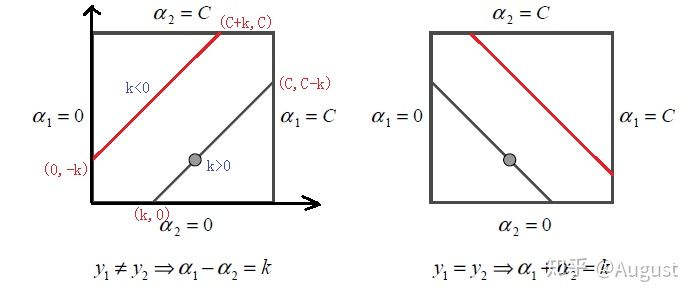

$0 \le \alpha_i \le C$将两个变量限制在$[0,C] \times [0,C]$的矩形中，$\alpha_1y_1 + \alpha_2y_2 = \varsigma$将两个变量限制在矩形中平行于对角线的线段上。左图为$y_1,y_2$异号的情况，右图为$y_1,y_2$同号的情况。

由于$\alpha_2^{new}$必须要在方框内且在直线上取得。假设L和H分别是上图中$\alpha_2^{new}$所在线段的边界（以图中的红色线段为例，L在y轴上的坐标为$(0,\alpha_2^{old} - \alpha_1^{old})$，H在平行于x轴对应的矩形上边的坐标为$(C + \alpha_2^{old} - \alpha_1^{old},C)$）。那么有：

$$L \le \alpha_2^{new} \le H$$

对于上面左图中的情况$y_1 ≠ y_2$，则

$$L = max(0,\alpha_2^{old} - \alpha_1^{old}) \hspace{0.3cm} H = min(C,C + \alpha_2^{old} - \alpha_1^{old})$$

对于上图右图中的情况$y_1 = y_2$，有：

$$L = max(0,\alpha_2^{old} - \alpha_1^{old} - C) \hspace{0.3cm} H = min(C,\alpha_2^{old} + \alpha_1^{old})$$

假如我们通过求导得到的$\alpha_2^{new,unc}$，则最终的$\alpha_2^{new}$应该为：

$$\alpha_2^{new} = 
\begin{cases}
    H & \alpha_2^{new,unc} > H \\
    \alpha_2^{new,unc} & L \le \alpha_2^{new,unc} \le H \\
    L & \alpha_2^{new,unc} < L
\end{cases}$$

利用上面讲到的$\alpha_2^{new,unc}$的关系式，我们就可以得到新的$\alpha_2^{new}$。

由于其它$m - 2$个变量固定，因此：

$$\alpha_1^{old}y_1 + \alpha_2^{old}y_2 = \alpha_1^{new}y_1 + \alpha_2^{new}y_2$$

求得：

$$\alpha_1^{new} = \alpha_1^{old} + y_1y_2(\alpha_2^{old} - \alpha_2^{new})$$

#### 3.6.4.3 计算$b$

在每次完成两个变量的优化后，需要重新计算阈值$b$。当$0 < \alpha_1^{new} < C$时，我们有：

$$y_1 - \sum_{i=1}^m\alpha_iy_i\mathcal{K}_{i1} - b_1 = 0$$

于是新的$b_1^{new}$为：

$$b_1^{new} = y_1 - \sum_{i=3}^m\alpha_iy_i\mathcal{K}_{i1} - \alpha_1^{new}y_1\mathcal{K}_{11} - \alpha_2^{new}y_2\mathcal{K}_{21}$$

计算出$E_1$为：

$$E_1 = h(x_1) - y_1 = \sum_{i=3}^m\alpha_iy_i\mathcal{K}_{i1} + \alpha_1^{old}y_1\mathcal{K}_{11} + \alpha_2^{old}y_2\mathcal{K}_{21} + b^{old} - y_1$$

将$b_1^{new}$用$E_1$表示为：

$$b_1^{new} = -E_1 - y_1(\alpha_1^{new} - \alpha_1^{old})\mathcal{K}_{11} - y_2(\alpha_2^{new} - \alpha_2^{old})\mathcal{K}_{21} + b^{old}$$

同样的，如果$0 < \alpha_2^{new} < C$，那么有：

$$b_2^{new} = -E_2 - y_1(\alpha_1^{new} - \alpha_1^{old})\mathcal{K}_{12} - y_2(\alpha_2^{new} - \alpha_2^{old})\mathcal{K}_{22} + b^{old}$$

最终的$b^{new}$为：

$$b^{new} = \frac{b_1^{new} + b_2^{new}}{2}$$

得到$b^{new}$后我们需要更新$E_i$：

$$E_i^{new} = \sum\limits_Sy_j\alpha_j\mathcal{K}(x_i,x_j) + b^{new} - y_i$$

其中，$S$是所有支持向量$x_j$的集合，利用$b^{new}$和$E_i^{new}$选择新的变量进行循环迭代。

#### 3.6.5 SMO算法总结

输入是$m$个线性可分的样本$(x_1,y_1),(x_2,y_2),\dots,(x_m,y_m)$，其中$x$为$n$维特征向量，$y$为二元分类结果$1$或$-1$，精度$\epsilon$。

输出是近似解$\alpha$。

算法过程如下：

1. 取初始值$\alpha^0 = 0, k = 0$。
2. 选择$\alpha_1^k,\alpha_2^k$，求出新的$\alpha_{new,unc}$：

$$\alpha_2^{new,unc} = \alpha_2^k + \frac{y_2(E_1 - E_2)}{\left(\mathcal{K}_{11} + \mathcal{K}_{22} - 2\mathcal{K}_{12}\right)}$$

3. 按照下式子求出$\alpha_2^{k+1}$：

$$\alpha_2^{k+1} = 
\begin{cases}
    H & \alpha_2^{new,unc} > H \\
    \alpha_2^{new,unc} & L \le \alpha_2^{new,unc} \le H \\
    L & \alpha_2^{new,unc} < L
\end{cases}$$

4. 利用$\alpha_2^{k+1}$和$\alpha_1^{k+1}$的关系求出$\alpha_1^{k+1}$.
5. 计算$b^{k+1}$和$E_i$。
6. 在精度$\epsilon$范围内是否满足如下的终止条件：

$$\sum_{i=1}^m\alpha_iy_i = 0$$
$$0 \le \alpha_i \le C \hspace{0.1cm} i = 1,2,\dots,m$$
$$\alpha_i^* = 0 \Rightarrow y_ih(x_i) > 1$$
$$0 < \alpha_i^* < C \Rightarrow y_ih(x_i) = 1$$
$$\alpha_i^* = C \Rightarrow y_ih(x_i) < 1$$

7. 如果满足则结束，返回$\alpha_2^{k+1}$，否则转到步骤2。

#### 3.6.6 迭代优化算法小结

目前我们已经学到两种基本的迭代优化算法，三种应用。下面用更加直观的方式一一说明。

1. 梯度下降（或上升）法：沿函数值增幅最大（即梯度方向）的反方向走，就能使函数值减小（或增大）幅度越大。主要应用在逻辑回归算法，深度学习等算法中。如下图所示：

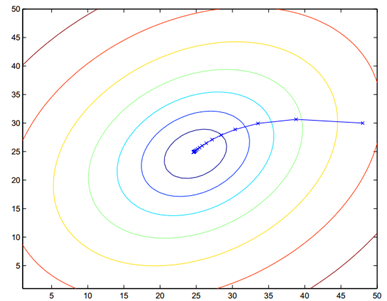

2. 坐标上升（或下降法）：每次只选择一个维度，将原始的问题变成一个一元函数，然后针对这个一元函数求极值，如此反复轮换不同的维度进行迭代。主要应用包括EM算法和SMO算法。

    * 对于EM算法，显然是一个二变量迭代的坐标上升问题，其特点是两个维度轮流迭代。难点是如何连接迭代步骤中的E步和M步（Jensen不等式）。如下图所示：
    
    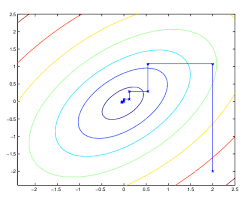
    
    * 对于SMO算法则是一个$m-1$（m表示样本量）维度的坐标下降问题，难点在于该选择哪个坐标作为下一个循环的迭代，同时还需要对求导得到的变量值进行约束条件限制。
    
我们的SVM优化目标函数并没有采用梯度下降法，而使用了SMO算法，对于参数$\alpha$每个样本对应一个分量，使用梯度下降法来迭代，需要更新$m$个分量，显然对于大样本量来说计算量又大，而且复杂。

总结：梯度下降（或上升）法是优化算法最简单的，也是最实用的。当问题变复杂时，梯度下降算法无法求出最优解，我们可以考虑使用坐标下降（或上升）法。

#### 3.7 SVM 回归模型（又称为SVR）

#### 3.7.1 SVR模型的损失函数度量

**回顾下我们SVM分类模型（SVC）**

传统的分类模型通常直接基于模型输出$h(x)$和真实类别$y$之间的差别来定义损失，每个样本点都对应一个损失，当$h(x)$与$y$的符号相同，距离决策边界越近，损失越大，对于误分类的点，距离决策边界越远，损失越大。而SVM分类仅关心决策边界附近易混淆或误分类的样本点，即防窃仅当样本点与决策边界的距离小于$\epsilon = 1$时，才计算损失，相当于以$f(x)$为中心，构建一个宽度为2的间隔带，间隔带外main正确分类的点都是没有损失的，误分类的点和讲个带里面的点时有损失的。

> 说明：如果按照这种损失的思想靠考虑，确实在计算时不应该考虑正确分分类的点

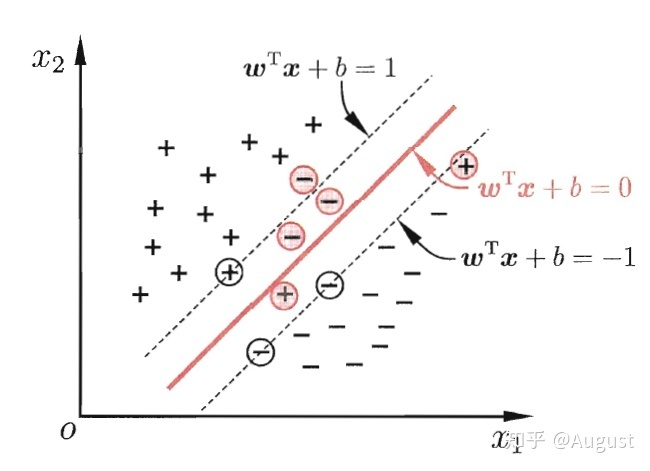

下图对比逻辑回归损失函数和SVC损失函数之间的区别：

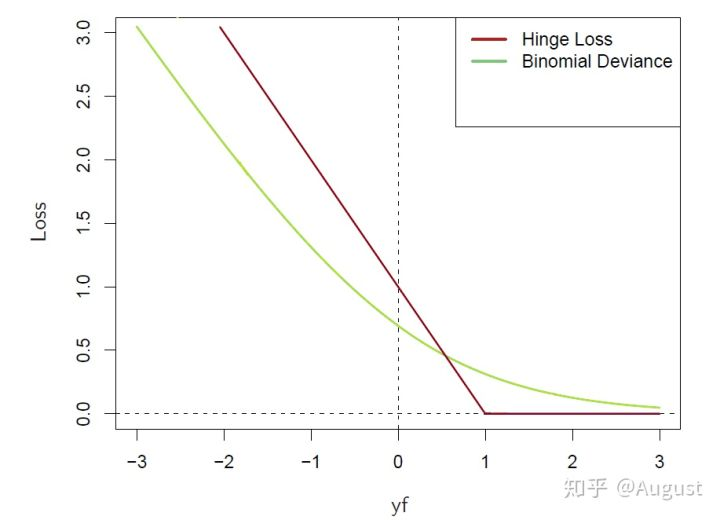

**再来看SVR**

传统的回归模型通常直接基于模型输出$h(x)$和真实输出$y$之间的差别来定义损失，当且仅当$h(x)$与$y$完全相同时，损失才为0。而SVR仅关心距离拟合模型较远的样本点，即当且仅当$f(x)$与$y$直接的差别大于$\epsilon$（不敏感损失）时，才计算损失，这就相当于以$f(x)$为中心，构建了一个宽度为$2\epsilon$的间隔带，间隔带里面的点都是没有损失的，外面的点是有损失的。

> 说明：在SVC中被正确分类的点，说明这些点离决策边界都比较远，而拿到SVR中来说，这些点的损失就是比较大的，应该回归损失定义是预测值完全等于实际值，损失才为0。在间隔内的点很显然能够更好地拟合模型，通过定义一个间隔带，来定义这个近似损失为0的样本点。

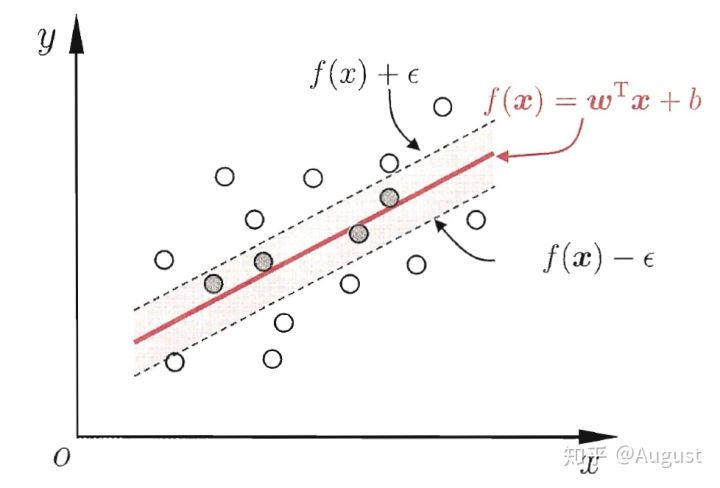

我们知道SVC的损失函数为：

$$\min \hspace{0.3cm} \frac{1}{m}\sum_{i=1}^m\max\{0,1 - y_i\widehat{y}_i\} + \frac{\lambda}{2}\|w\|_2^2$$

由此我们有SVR的损失函数为：

$$\min \hspace{0.3cm} \frac{1}{m}\sum_{i=1}^m\max\{0,\mid y_i\widehat{y}_i - \epsilon \mid \}+ \frac{\lambda}{2}\|w\|_2^2$$

下图对比SVR损失函数和LR均方差损失函数之间的区别：

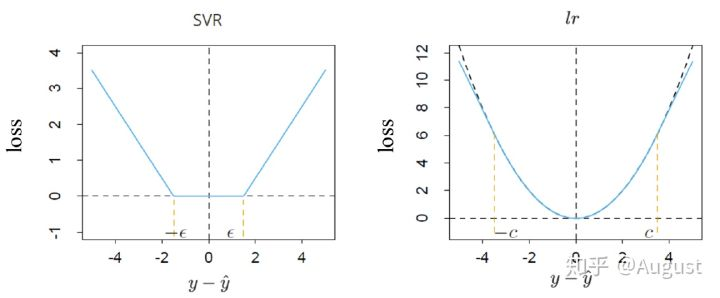

我们来看下SVC和SVR的代价函数，有什么区别：

SVC和SVR之间的区别主要体现在$1 - y\widehat{y}_i$和$\mid y_i\widehat{y}_i - \epsilon \mid$，具体来说有三个区别：

* SVR用的是$\epsilon$而SVC用的是1。即SVC用的相对距离，而SVR是绝对距离。SVC分类模型只要考虑距离决策边界的相对距离，实际距离没有意义，而SVR则不同，需要实际的距离损失；
* SVR是$\mid y\widehat{y}_i \mid$，而SVC是$y\widehat{y}_i$，SVR考虑是拟合样本的情况，而对于样本的正负没关心，而SVC则需要考虑误分类和间隔内点的情况，$y\widehat{y}_i$是小于0的，而正确分类是大于0的，其考虑的是有向距离；
* 在SVC中，只有误分类和间隔内点才有损失，故而有$y\widehat{y}_i < 1$，其损失为$1 - y\widehat{y}_i = \max\{0,1 - y\widehat{y}_i\}$。而SVR是间隔带外才有损失，故而是$y\widehat{y}_i > 1$，其损失为$\mid y\widehat{y}_i \mid - \epsilon = \max\{0,\mid y\widehat{y}_i \mid - \epsilon\}$

> 说明：无论是SVC的硬间隔还是软间隔都是有损失的，只是硬间隔没有考虑间隔内的样本点的损失，而软间隔包括间隔内和误分类损失，这些点都是$y_i\widehat{y}_i < 0$的点；而对于SVR损失是只有间隔外点的才有，即$y_i\widehat{y}_i > 1$的点，间隔内的点是在$2\epsilon$这个自定义的间隔带内损失都被视为0。<font color=red>其实，我是想为什么不以完全拟合点为标准呢，而要定义一个间隔带这样的安全区呢？</font>

#### 3.7.2 SVR目标函数的原始形式

我们来看下SVR的目标函数：

$$\begin{align*}
\min \hspace{0.3cm} &\frac{1}{2}\|w\|_2^2 \\
s.t.  \hspace{0.3cm} &\mid y_i - w \cdot \phi(x_i) - b \mid \le \epsilon \hspace{0.1cm} (i = 1,2,\dots,m)
\end{align*}$$

SVR中加入松弛变量$\xi_i$后变为：

$$\begin{align*}
\min \hspace{0.3cm} &\frac{1}{2}\|w\|_2^2 + C\sum_{i=1}^m(\xi_i^{\vee} + \xi_i^{\wedge}) \\
s.t. \hspace{0.3cm} &-\epsilon-\xi_i^{\vee} \le y_i - w\cdot \phi(x_i) - b \le \epsilon + \xi_i^{\wedge} \\
&\xi_i^{\vee} \ge 0, \xi_i^{\wedge}  \ge 0 \hspace{0.1cm} (i = 1,2,\dots,m)
\end{align*}$$

> 说明：参数$\xi_i^{\vee}$和$\xi_i^{\wedge}$是用来调整间隔间距的，且为两个不同的值，$\epsilon$为固定值。

用拉格朗日函数将目标优化函数变成无约束的形式：

$$L(w,b,\alpha_i^{\vee},\alpha_i^{\wedge},\xi_i^{\vee},\xi_i^{\wedge},\mu^{\vee},\mu^{\wedge}) = \frac{1}{2}\|w\|_2^2 + C\sum_{i=1}^m(\xi_i^{\vee} + \xi_i^{\wedge}) + \sum_{i=1}^m\alpha_i^{\vee}(\epsilon-\xi_i^{\vee} - y_i + w\cdot \phi(x_i) + b) + \sum_{i=1}^m\alpha_i^{\wedge}(y_i - w\cdot \phi(x_i) - b - \epsilon - \xi_i^{\wedge}) - \sum_{i=1}^m\mu^{\vee}\xi_i^{\vee} - \sum_{i=1}^m\mu^{\wedge}\xi_i^{\wedge}$$

其中$\mu^{\vee} \ge 0,\mu^{\wedge} \ge 0,\alpha_i^{\vee} \ge 0,\alpha_i^{\wedge} \ge 0$，均为拉格朗日系数。

从上式中可以看出，由于绝对值的存在，SVR中的变量比SVC多了一倍。

> 再次申明：这边的$\alpha_i^{\vee},\alpha_i^{\wedge},\xi_i^{\vee},\xi_i^{\wedge},\mu^{\vee},\mu^{\wedge}$都是不同的变量，并不存在直接的关系。

#### 3.7.3 SVR目标函数的对偶形式

前面降到了SVM回归模型的目标函数的原始形式，我们的目标是：

$$\underbrace{\min}_{w,b,\xi_i^{\vee},\xi_i^{\wedge}}\underbrace{\max}_{\alpha_i^{\vee} \ge 0,\alpha_i^{\wedge} \ge 0,\mu^{\vee} \ge 0,\mu^{\wedge} \ge 0} \hspace{0.5cm}L(w,b,\alpha_i^{\vee},\alpha_i^{\wedge},\xi_i^{\vee},\xi_i^{\wedge},\mu^{\vee},\mu^{\wedge})$$

和SVM分类模型一样，这个优化目标函数也满足KKT条件，也就是说，我们可以通过拉格朗日对偶将优化问题转换为等价的对偶问题来求解：

$$\underbrace{\max}_{\alpha_i^{\vee} \ge 0,\alpha_i^{\wedge} \ge 0,\mu^{\vee} \ge 0,\mu^{\wedge} \ge 0}\underbrace{\min}_{w,b,\xi_i^{\vee},\xi_i^{\wedge}} \hspace{0.5cm}L(w,b,\alpha_i^{\vee},\alpha_i^{\wedge},\xi_i^{\vee},\xi_i^{\wedge},\mu^{\vee},\mu^{\wedge})$$

我们可以先优化函数对于$w,b,\xi_i^{\vee},\xi_i^{\wedge}$的极小值，接着再求拉格朗日乘子$\alpha_i^{\vee},\alpha_i^{\wedge},\mu^{\vee},\mu^{\wedge}$的极大值。

首先我们来优化函数对于$w,b,\xi_i^{\vee},\xi_i^{\wedge}$的极小值，这个可以通过求偏导得到：

$$\frac{\partial L}{\partial w} = 0 \Rightarrow w = \sum_{i=1}^m(\alpha_i^{\vee} - \alpha_i^{\wedge})\phi(x_i)$$
$$\frac{\partial L}{\partial b} = 0 \Rightarrow \sum_{i=1}^m(\alpha_i^{\vee} - \alpha_i^{\wedge})$$
$$\frac{\partial L}{\partial \xi_i^{\vee}} \Rightarrow C - \alpha_i^{\vee} - \mu^{\vee} = 0$$
$$\frac{\partial L}{\partial \xi_i^{\wedge}} \Rightarrow C - \alpha_i^{\wedge} - \mu^{\wedge} = 0$$

我们把上面4个式子带入$L(w,b,\alpha_i^{\vee},\alpha_i^{\wedge},\xi_i^{\vee},\xi_i^{\wedge},\mu^{\vee},\mu^{\wedge})$消去$w,b,\xi_i^{\vee},\xi_i^{\wedge}$。

最终得到其对偶形式为：

$$\begin{align*}
\underbrace{\min}_{\alpha^{\vee},\alpha^{\wedge}} \hspace{0.3cm} &\frac{1}{2}\sum_{i,j=1}^m(\alpha_i^{\vee} - \alpha_i^{\wedge})(\alpha_j^{\vee} - \alpha_j^{\wedge})\mathcal{K}_{ij} + \sum_{i=1}^m(\epsilon - y_i)\alpha_i^{\vee} + (\epsilon + y_i)\xi_i^{\wedge} \\
s.t. \hspace{0.3cm} &\sum_{j=1}^m(\alpha_i^{\vee} - \alpha_i^{\wedge}) = 0 \\
&0 < \alpha_i^{\vee} < C  \hspace{0.1cm} (i=1,2,\dots,m) \\
&0 < \alpha_i^{\wedge} < C  \hspace{0.1cm} (i=1,2,\dots,m)
\end{align*}$$

用SMO算法来求出对应的$\alpha^{\vee},\alpha^{\wedge}$，进而求出我们的回归模型系数$w,b$。

#### 3.8 SVM 算法小结

SVM算法的主要优点有：

* 仅仅使用一部分支持向量来做超平面的决策，无需依赖全部数据，有较好的鲁棒性。
* 有大量的核函数可以使用，从而可以很灵活的来解决各种非线性的分类回归问题。
* 分类准确率高，泛化能力强。

SVM算法的主要缺点有：

* SVM一般用于样本数大于特征维度的场景。（不依赖于样本数量）
* 由于SVM计算量过大，不太适合样本量非常大时使用。
* 非线性问题的核函数的选择没有通用标准，难以选择一个合适的核函数。

#### 3.9 Scikit-learn SVM使用小结

Scikit-learn中SVM算法库分为两类，一类是分类的算法库，包括SVC，NuSVC和LinearSVC。另一类是回归算法库，包括SVR，NuSVR和LinearSVR。

对于分类模型，SVC和NuSVR仅仅在于对损失的度量方式不同，而LinearSVC是线性分类，对于线性不可分的数据不能使用。

同理，对于回归模型，SVR和NuSVR仅仅在于对损失的度量方式不同。LinearSVR是线性回归。

除非知道数据是线性的，我们使用LinearSVC和LinearSVR。一般都使用SVC或SVR。

如果我们对训练集训练的错误率或支持向量的百分比有要求的时候，可以选择NuSVC或NuSVR。它们有一个参数来控制这个百分比。

SVC参数总结如下：

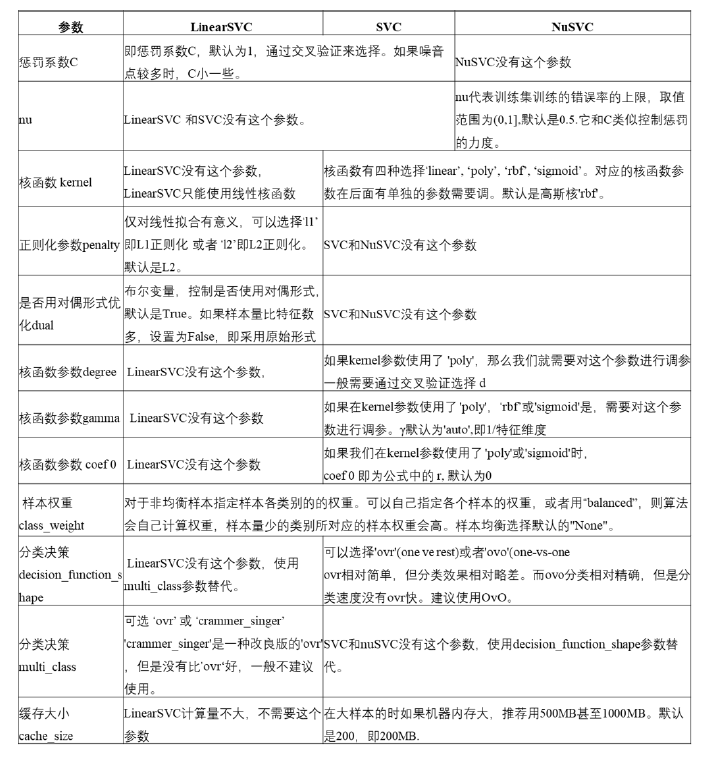

> 说明：我们在LR中的多分类是使用了multi_class参数，其默认是ovr，而在SVM中是使用decision_function_shape，建议选择'ovo'。

SVR参数总结如下：

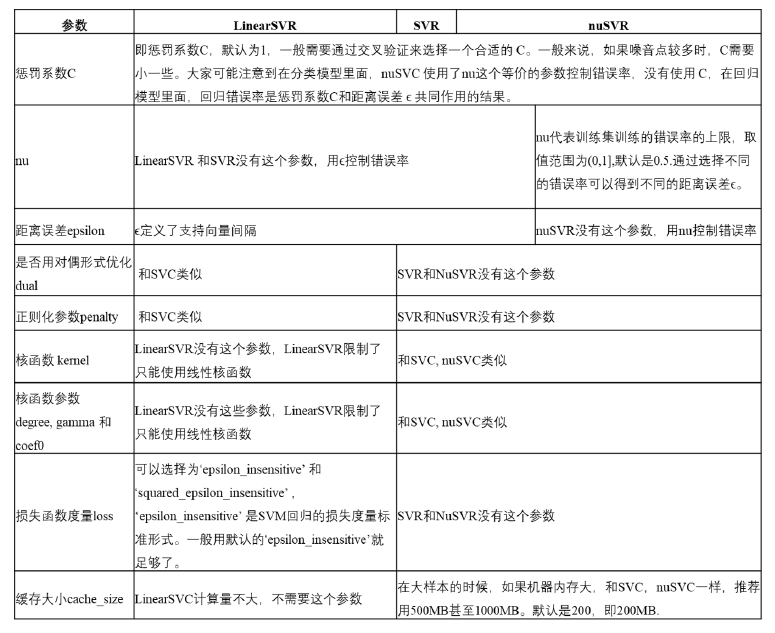

> 说明SVR中epsilon参数是用于定义间隔带的，也就是在间隔带内的数据是默认没有损失的

这里对其它的调参要点做以下几点说明：

* 训练模型之前对数据进行归一化。（决策树不需要对数据进行标准化，归一化能操作；而LR是需要对数据进行幅度缩放的，也就是z_score标准化，让制函数不收敛）
* 在特征数非常多的情况下，或者样本数远小于特征数的时候，只需使用线性核即可。（一般能够线性可分，不需要特征映射，选择其它核函数，涉及到特征映射运算，增加计算量）
* 在选择核函数时，如果线性拟合不好，一般推荐使用默认的高斯核“rbf”。这时我们主要需要对惩罚系数$C$和核函数参数$\gamma$进行调参。
* 理论上高斯核不会比线性核差，高斯核要花费更多的时间，所以能用线性核解决问题尽量使用线性核。

> 说明：在机器学习算法中，会有针对性地偏向样本数和特征维度数的情况，另外可能会对正负样本敏感。